In [7]:
#Title: Probability of Default (POD) Estimation using Multiple ML Algorithms

###Author: R.Shyaam Prasadh

"""
In this project, we explore various Machine Learning algorithms for estimating the Probability of Default (POD). 
The algorithms we consider include Logistic Regression, Random Forest, Neural Network, XGBoost, Bayesian Model, K-Means, and DBScan clustering algorithm.

By evaluating the performance of each algorithm, we aim to determine which method is the most accurate and effective for predicting the POD. 
Through this analysis, we hope to provide valuable insights into the best practices for estimating POD using Machine Learning.

"""


'\nIn this project, we explore various Machine Learning algorithms for estimating the Probability of Default (POD). \nThe algorithms we consider include Logistic Regression, Random Forest, Neural Network, XGBoost, Bayesian Model, K-Means, and DBScan clustering algorithm.\n\nBy evaluating the performance of each algorithm, we aim to determine which method is the most accurate and effective for predicting the POD. \nThrough this analysis, we hope to provide valuable insights into the best practices for estimating POD using Machine Learning.\n\n'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

credit_data = pd.read_csv('credit_data_risk.csv')
del credit_data['Unnamed: 0']
print(credit_data.describe())

plt.rcParams["figure.figsize"] = (10,6)
numerical_credit_data = credit_data.select_dtypes(exclude='O')
print(numerical_credit_data)

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000
     Age  Job  Credit amount  Duration
0     67    2           1169         6
1     22    2           5951        48
2     49    1           2096        12
3     45    2           7882        42
4     53    2           4870        24
..   ...  ...            ...       ...
995   31    1           1736        12
996   40    3           3857        30
997   38    2            804        12
998   23    2           1845        45
999   27    2           4576   

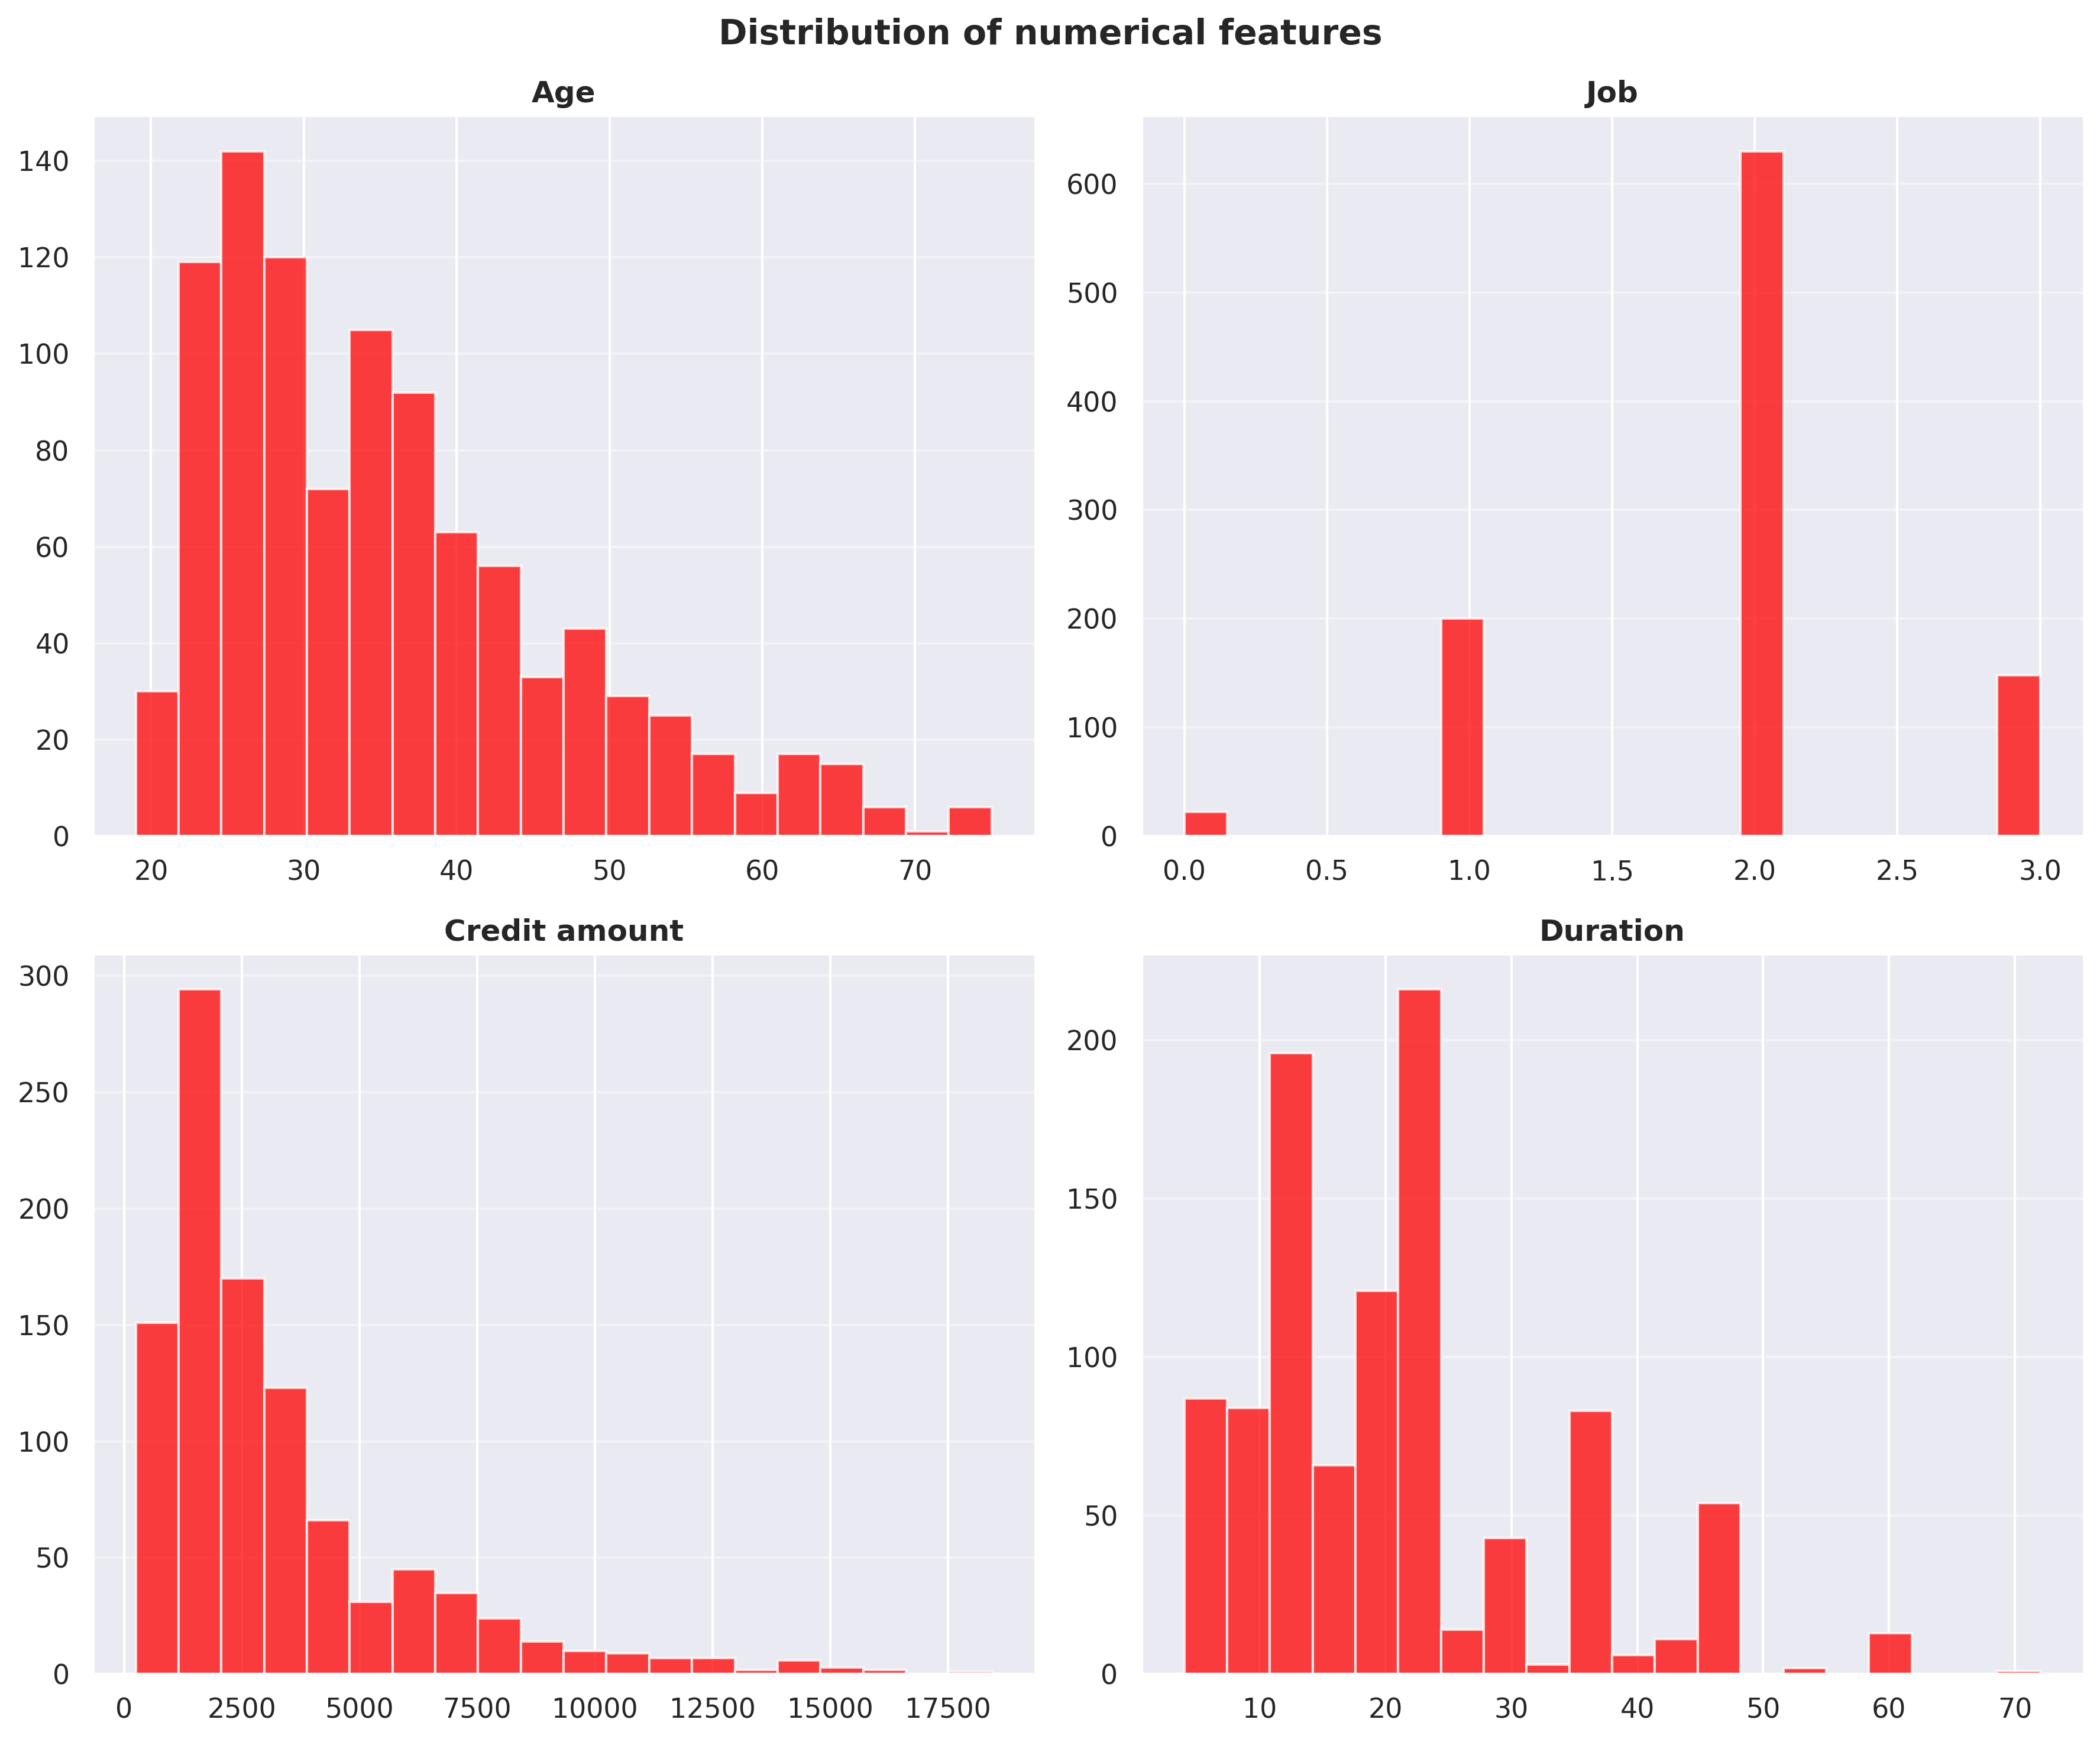

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()
cols = numerical_credit_data.columns

for i, j in enumerate(cols):
    axs[i].hist(numerical_credit_data[j], bins=20, color='red', alpha=0.75, edgecolor='white')
    axs[i].set_title(j, fontsize=12, fontweight='bold')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].grid(axis='y', alpha=0.4)

plt.suptitle('Distribution of numerical features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



## Kmeans-Algorithm


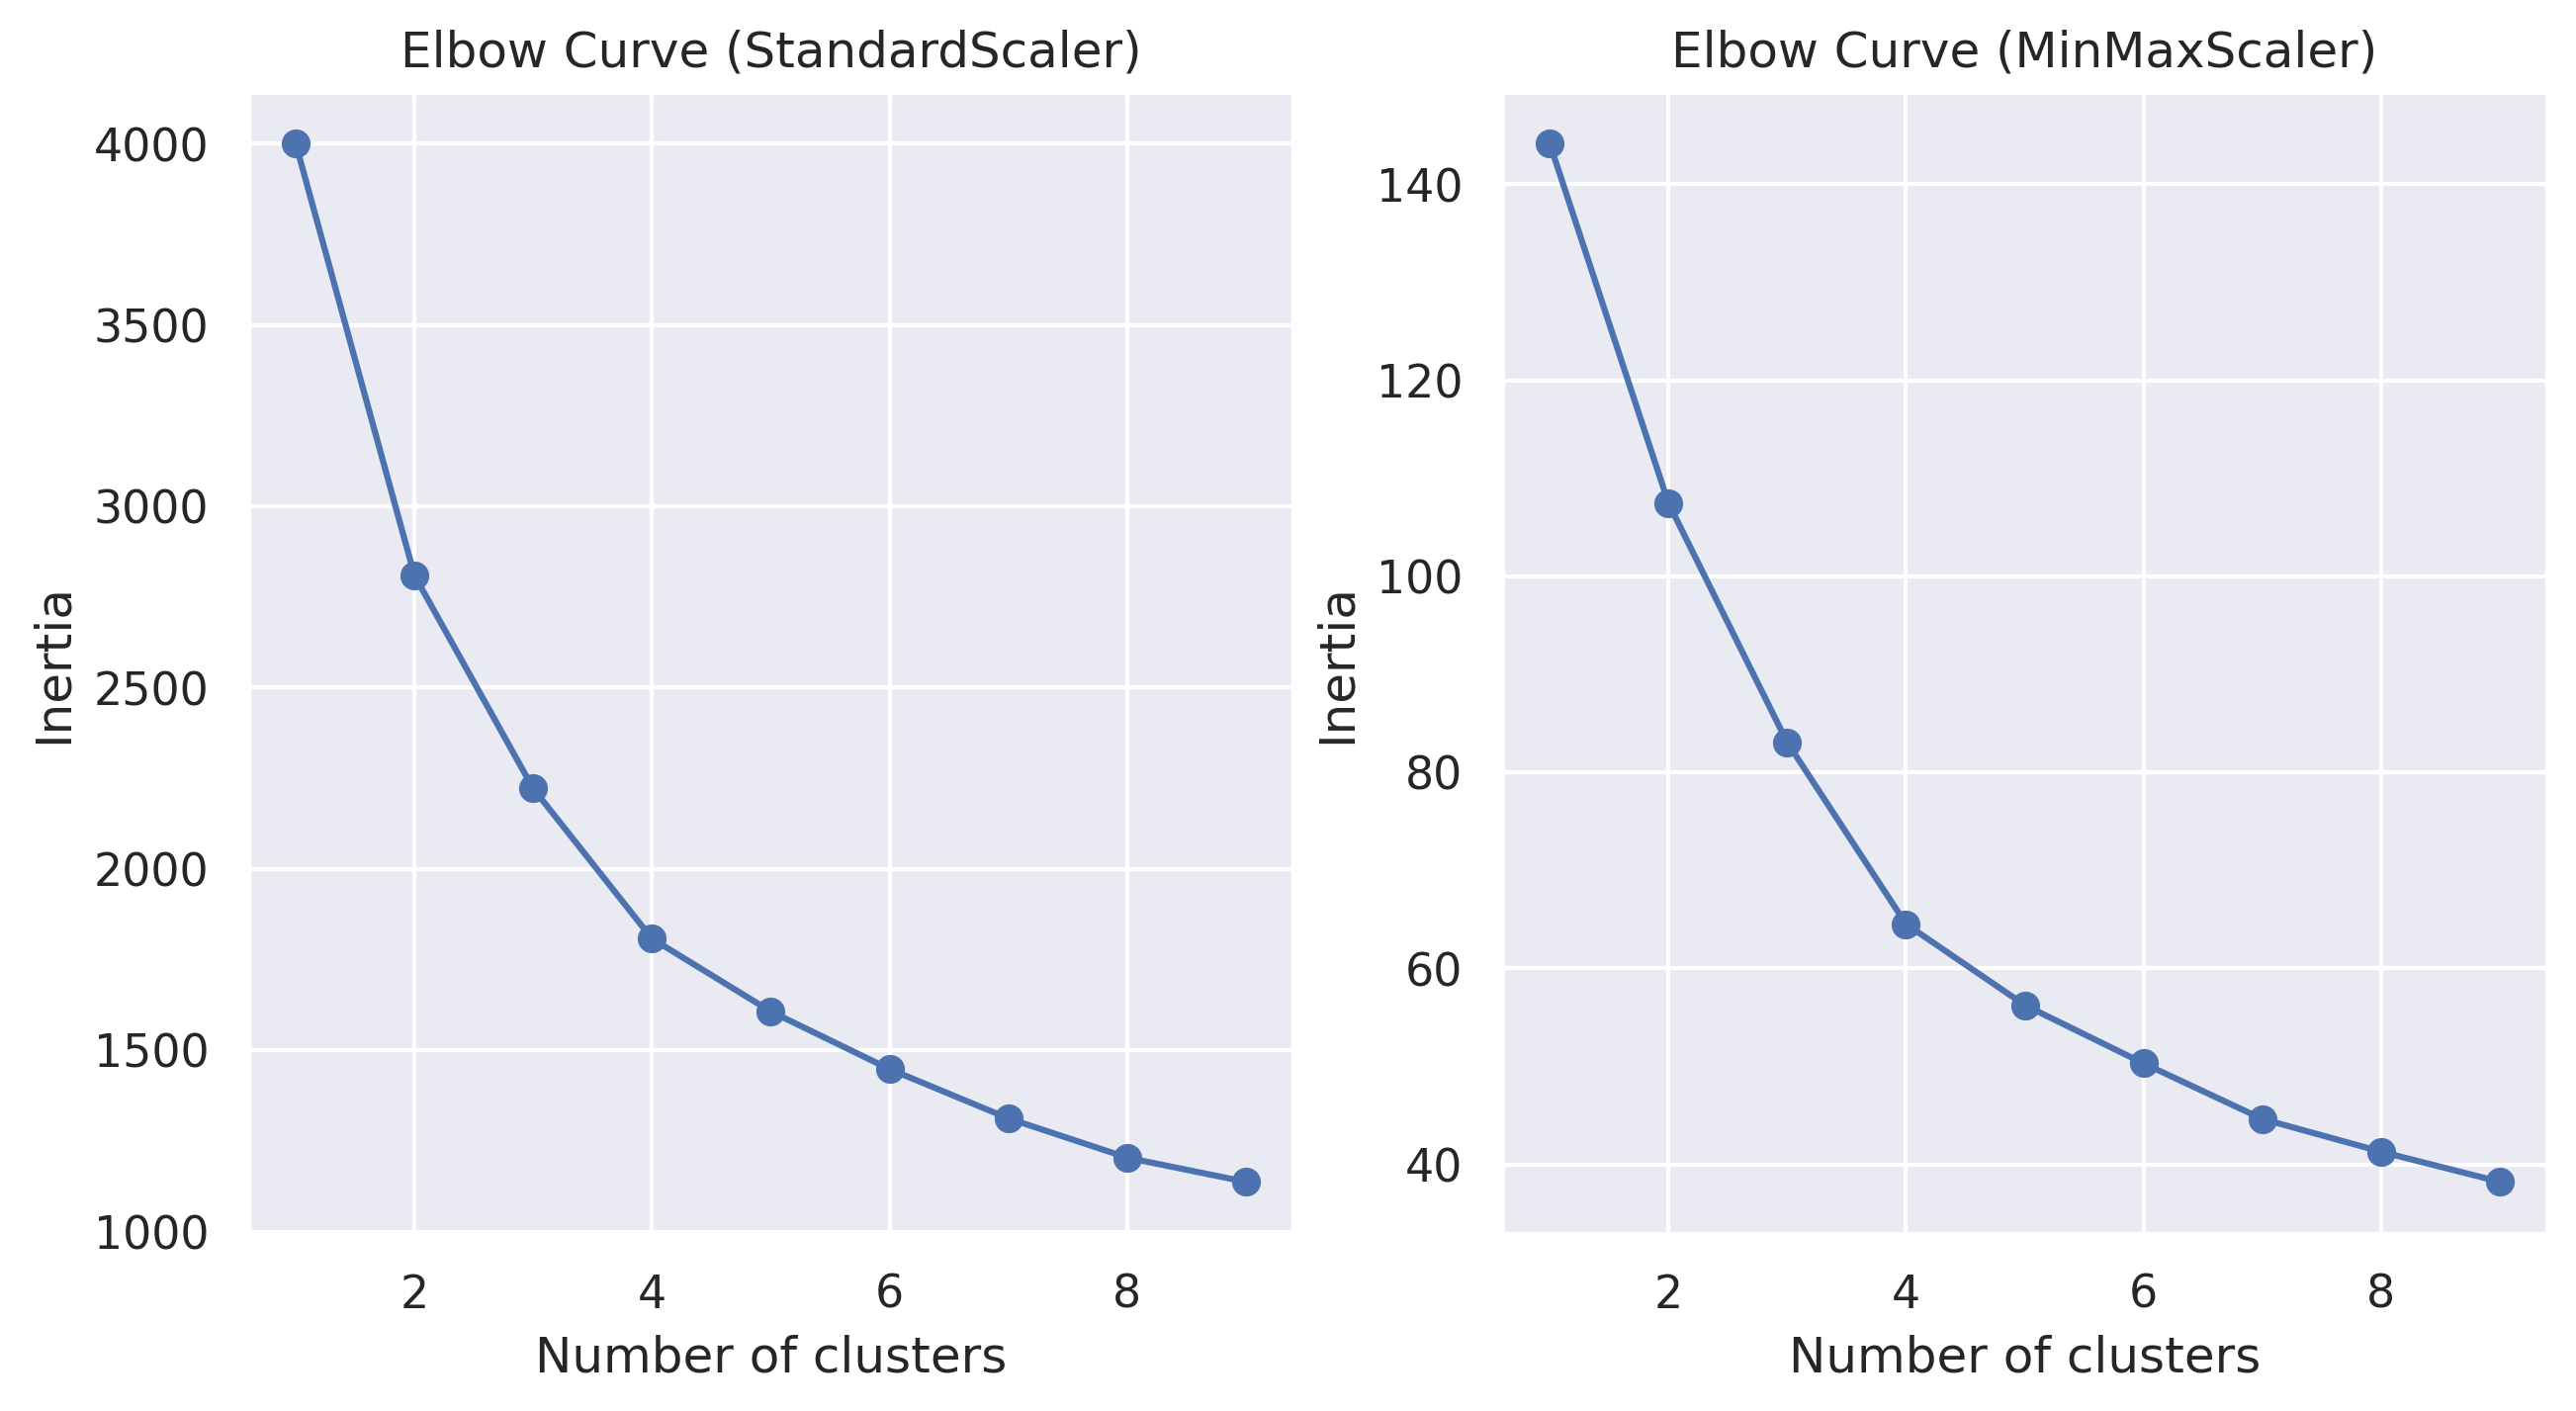

In [8]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Standardize the data using StandardScaler and MinMaxScaler
scalers = [StandardScaler(), MinMaxScaler()]
standardized_data = [scaler.fit_transform(numerical_credit_data) for scaler in scalers]

# Calculate the inertia for different numbers of clusters for each standardized data
inertia_values = []
for X in standardized_data:
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    inertia_values.append(inertia)

# Plot the elbow curve for each standardization method
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i, inertia in enumerate(inertia_values):
    ax[i].plot(range(1, 10), inertia, 'bo-')
    ax[i].set_xlabel('Number of clusters')
    ax[i].set_ylabel('Inertia')
    ax[i].set_title(f'Elbow Curve ({scalers[i].__class__.__name__})')
plt.show()




## Silhouette analysis on KMeans clustering

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


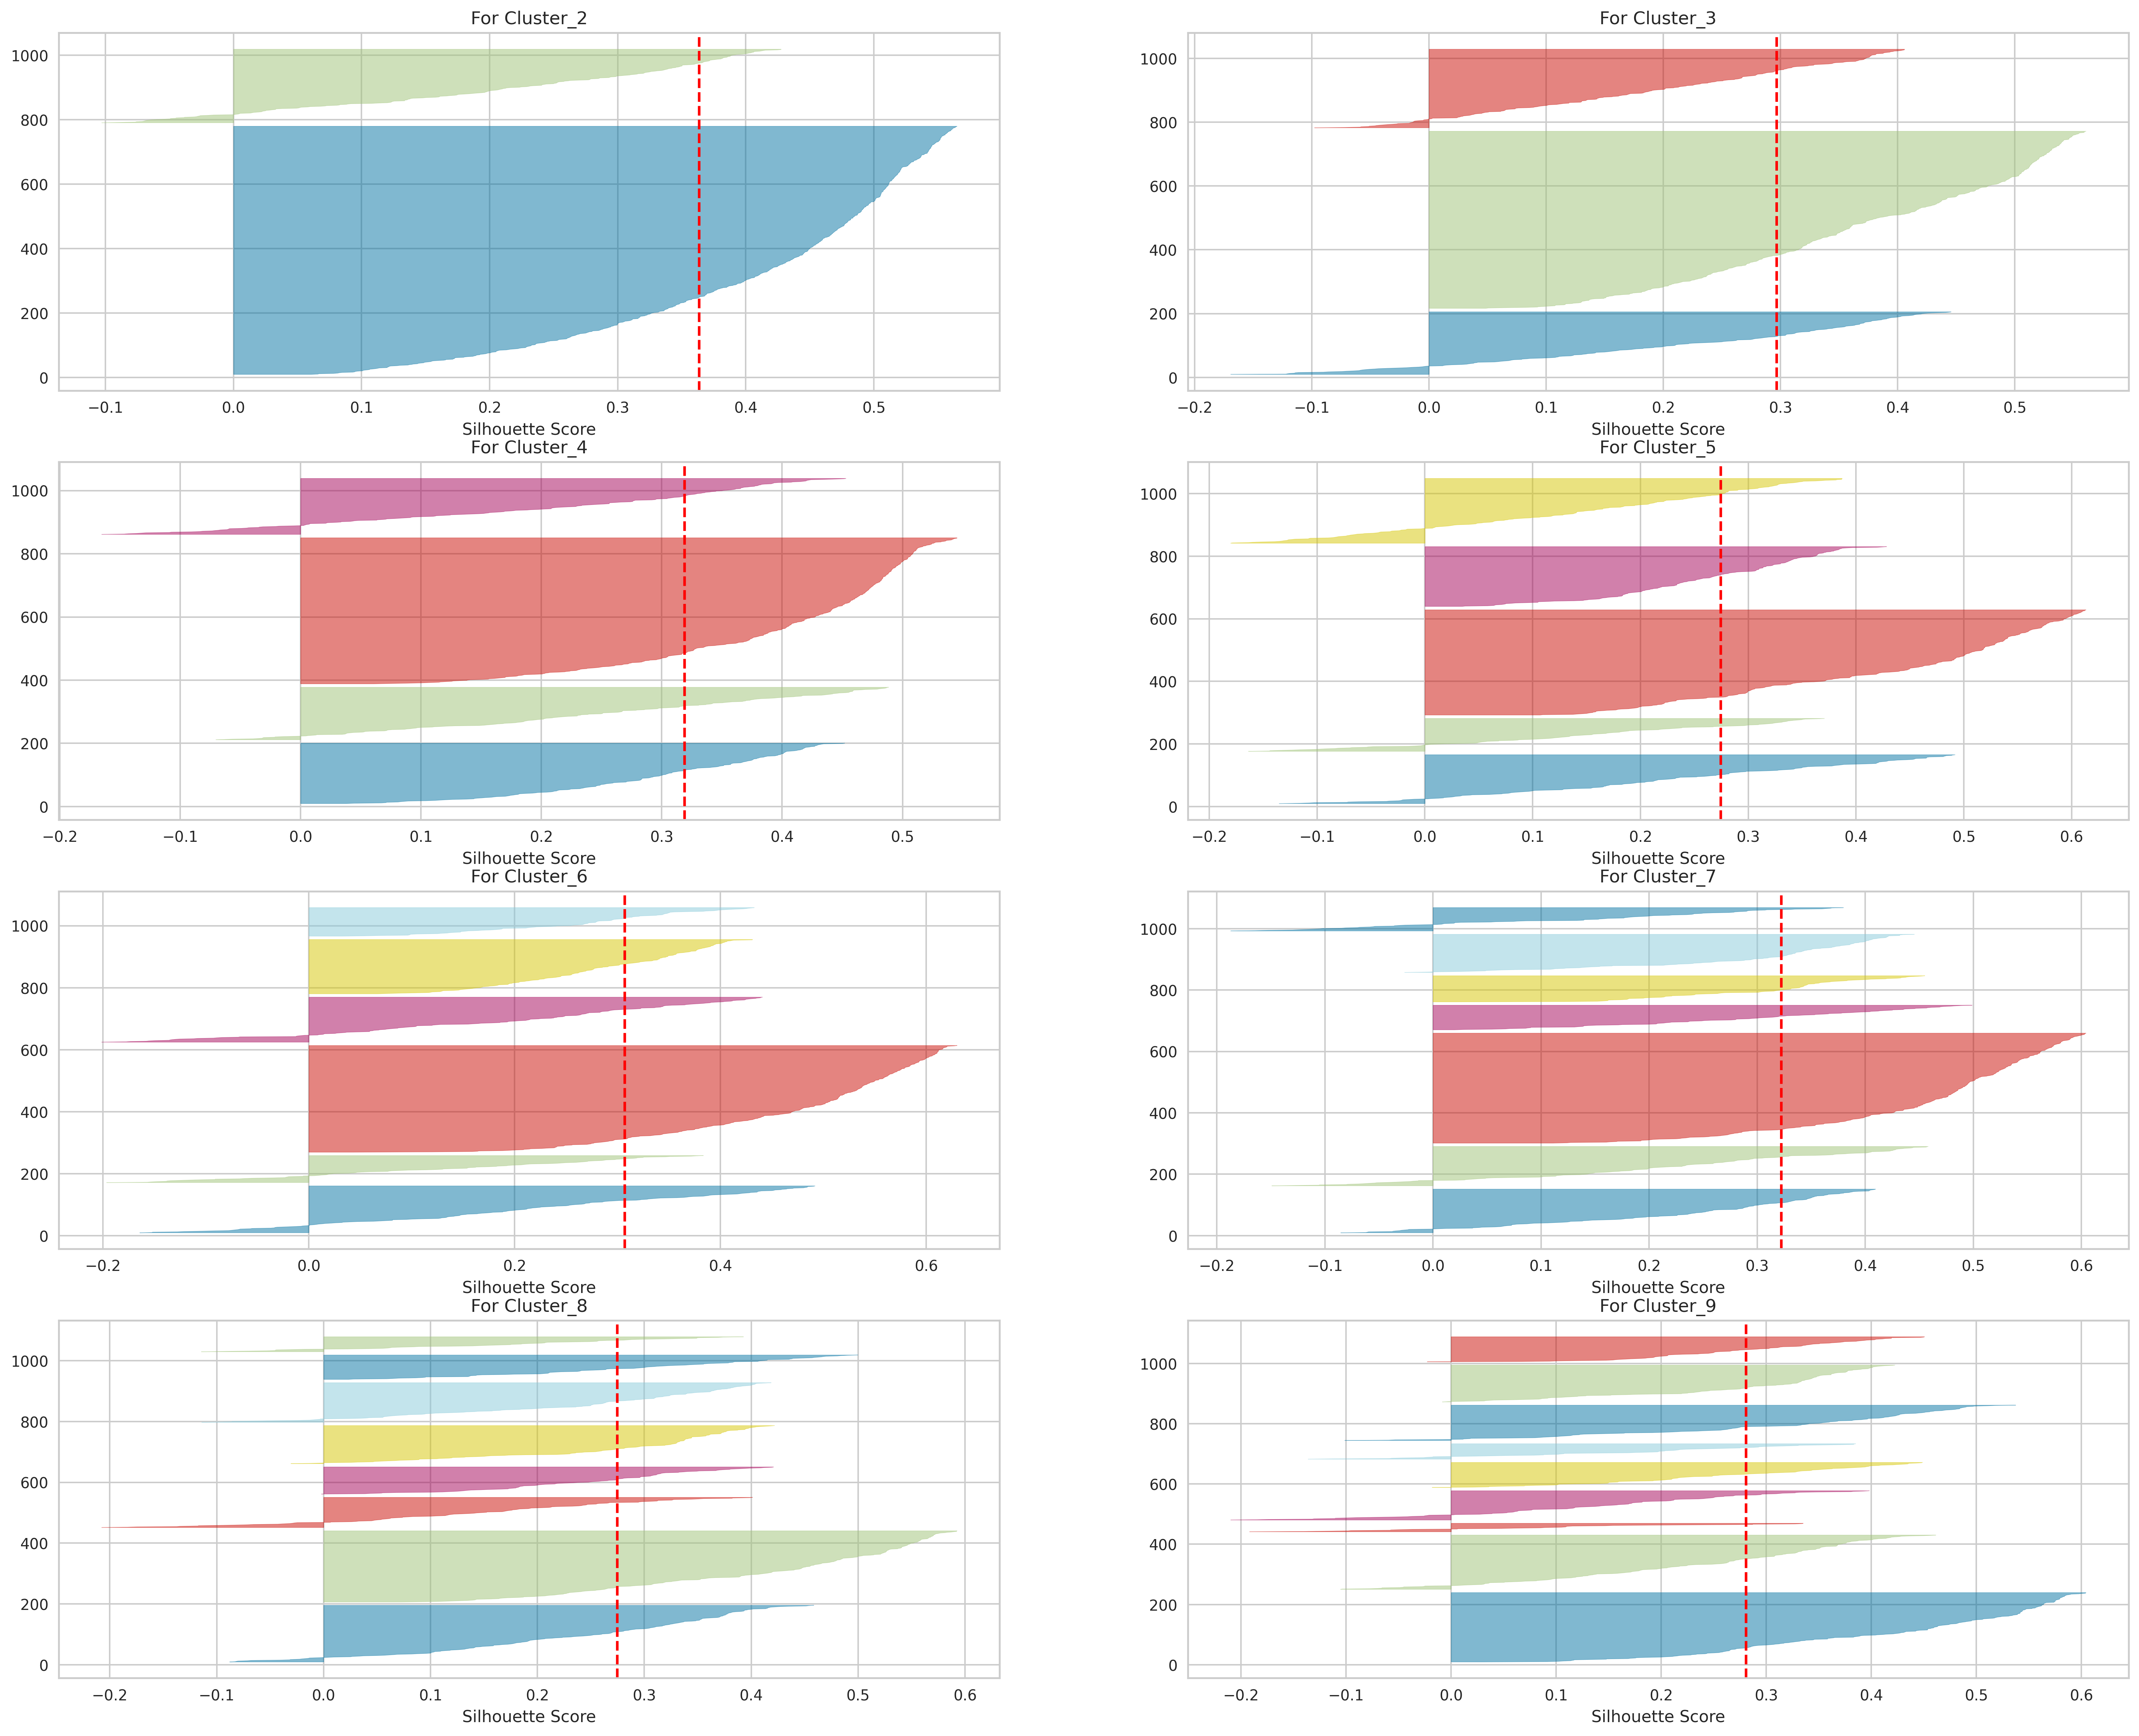

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_credit_data)

fig, ax = plt.subplots(4, 2, figsize=(25, 20))
cluster_range = range(2, 10)

for i, n_clusters in enumerate(cluster_range):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i//2, i%2])
    visualizer.fit(standardized_data)
    ax[i//2, i%2].set_title(f"For Cluster_{n_clusters}")
    ax[i//2, i%2].set_xlabel("Silhouette Score")



### KElbowVisualizer


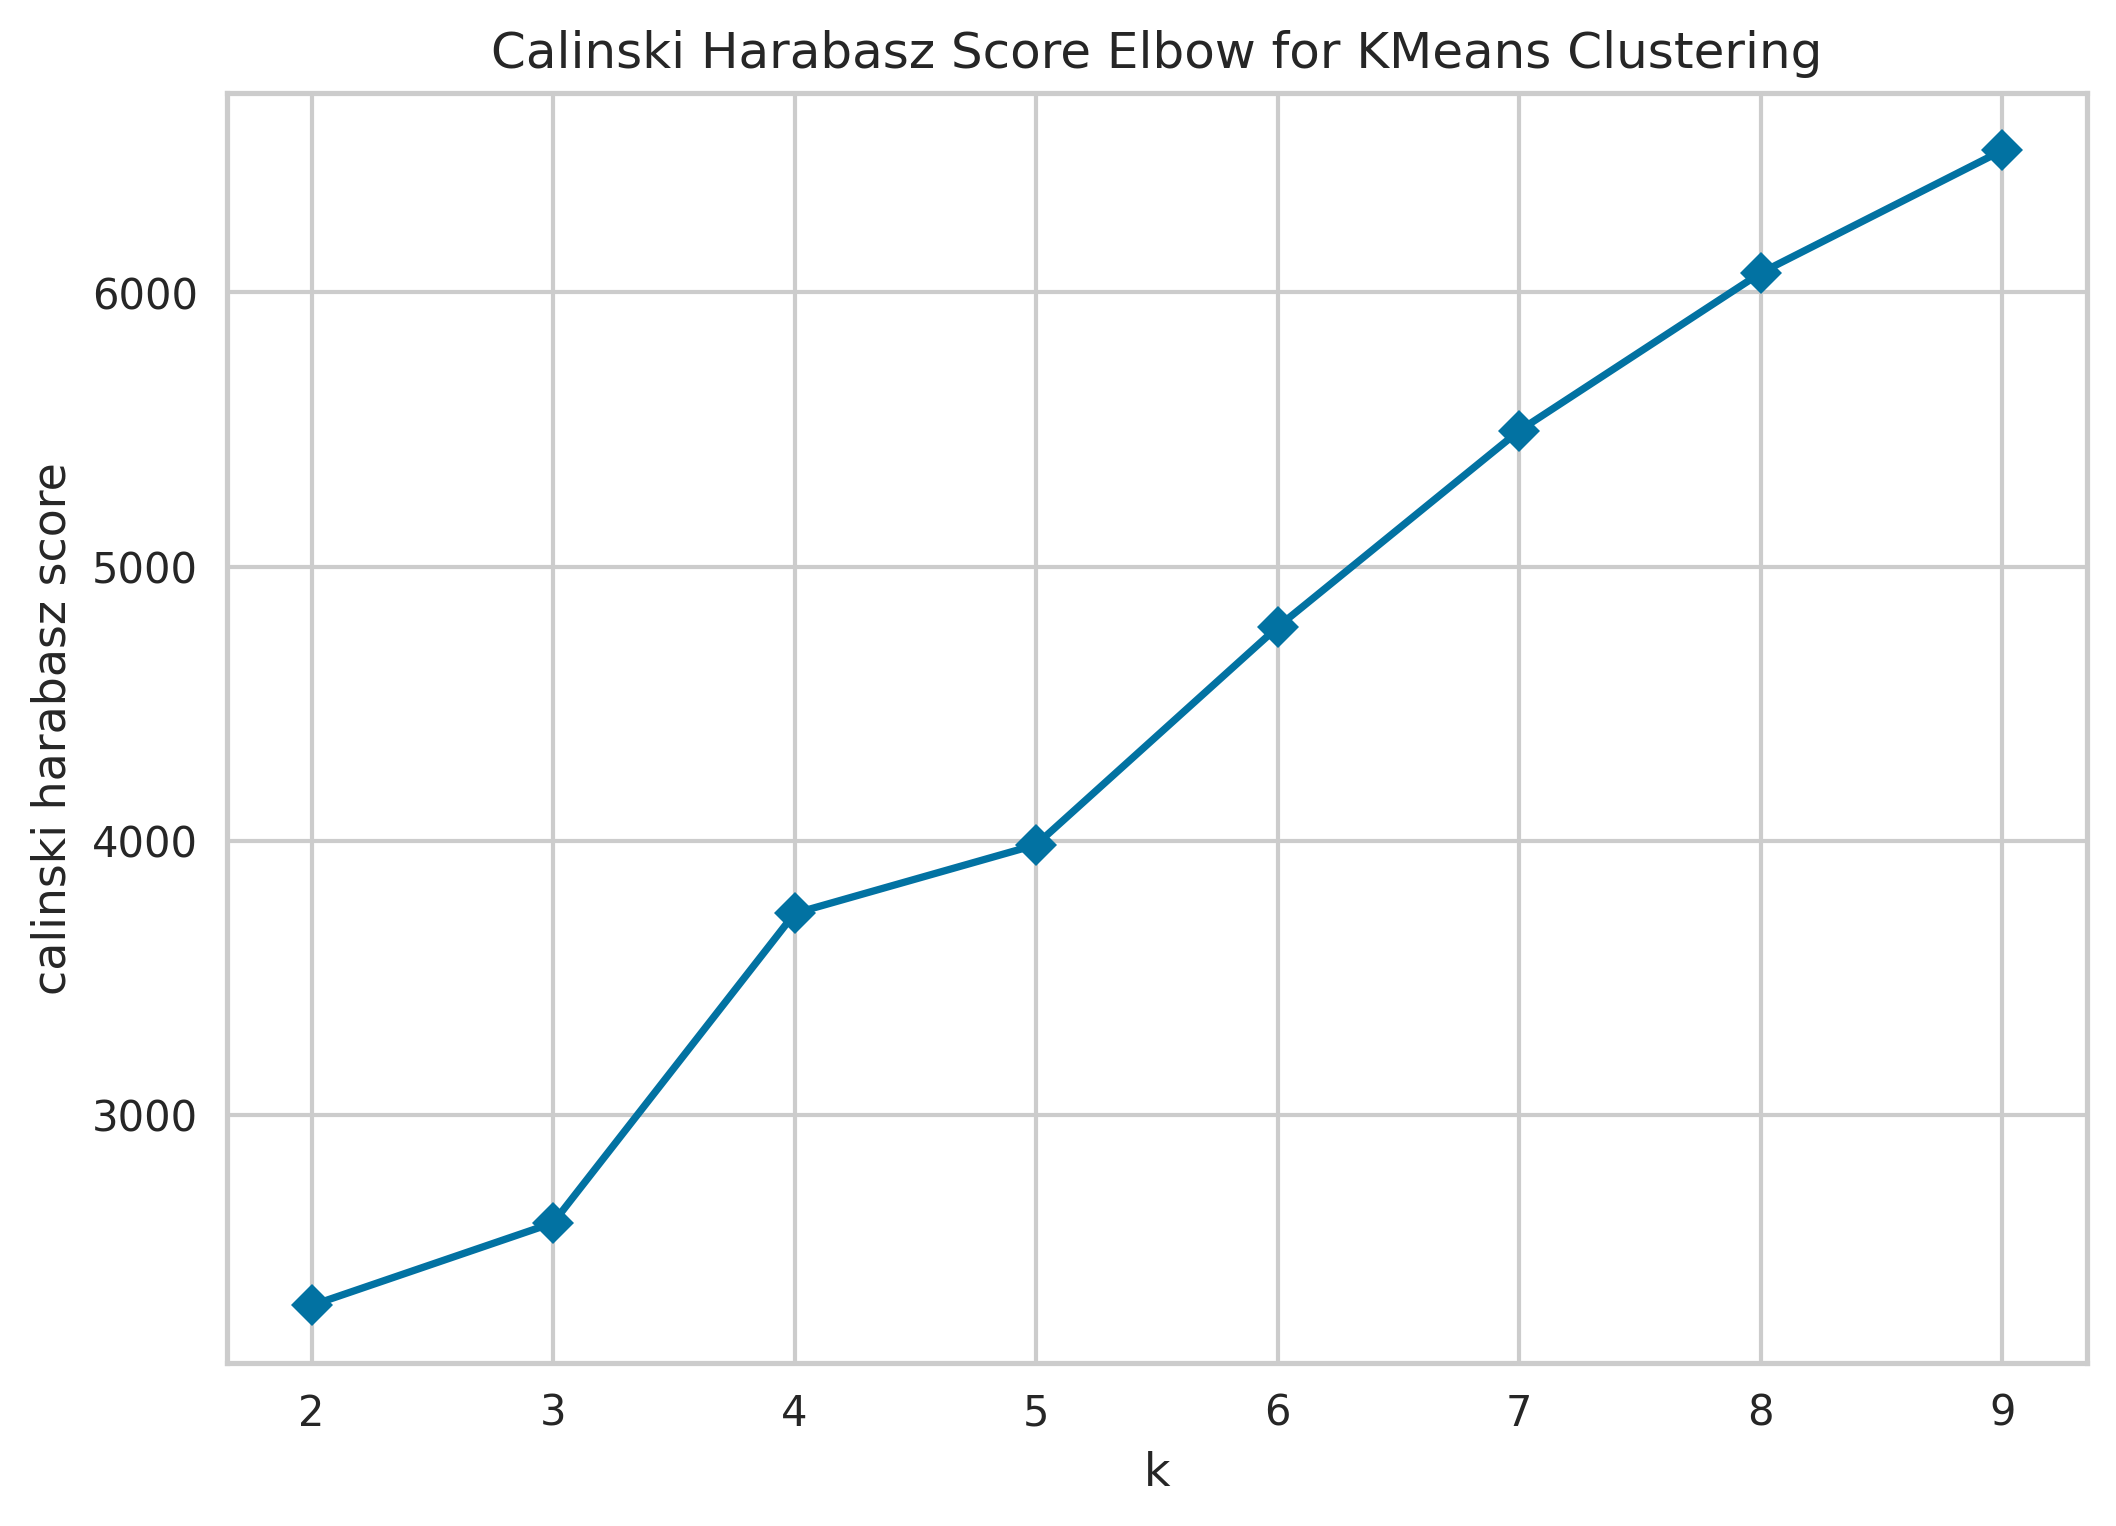

In [10]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

kmeans_model = KMeans()
elbow_visualizer = KElbowVisualizer(
    kmeans_model, k=(2, 10), metric='calinski_harabasz', timings=False)
elbow_visualizer.fit(numerical_credit_data)
elbow_visualizer.show()
warnings.simplefilter(action='ignore', category=RuntimeWarning)


### Gap_statistic

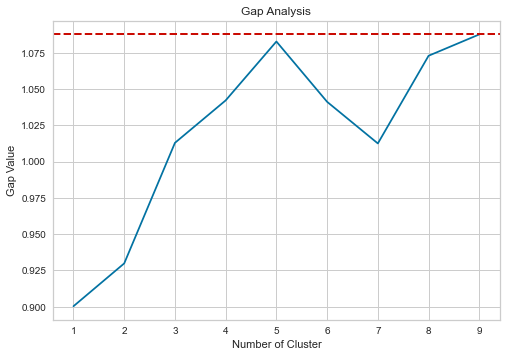

In [6]:
from gap_statistic.optimalK import OptimalK
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(standardized_data, cluster_array=np.arange(1, 10))

gap_result = optimalK.gap_df
gap_result.head()


plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
            linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(standardized_data)


print(clusters)

[0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 

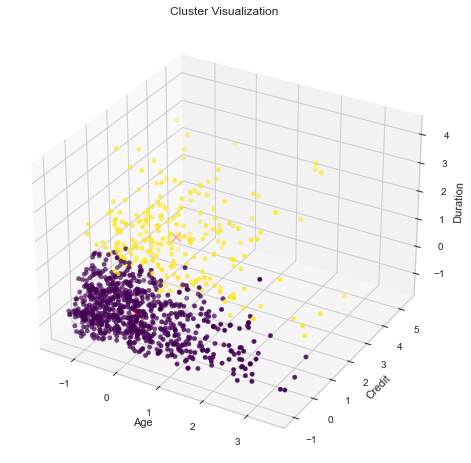

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(standardized_data[:, 0], standardized_data[:, 2], standardized_data[:, 3], c=kmeans.labels_, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=80, marker='x', color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Credit')
ax.set_zlabel('Duration')
plt.title('Cluster Visualization')
plt.show()


In [13]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = standardized_data[np.where(kmeans.labels_==i)]


credit_data['clusters'] = pd.DataFrame(kmeans.labels_)

df_scaled = pd.DataFrame(standardized_data)
df_scaled['clusters'] = credit_data['clusters']



df_scaled['Risk'] = credit_data['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']




In [14]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts(), df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

(good    573
 bad     193
 Name: Risk, dtype: int64,
 good    127
 bad     107
 Name: Risk, dtype: int64)

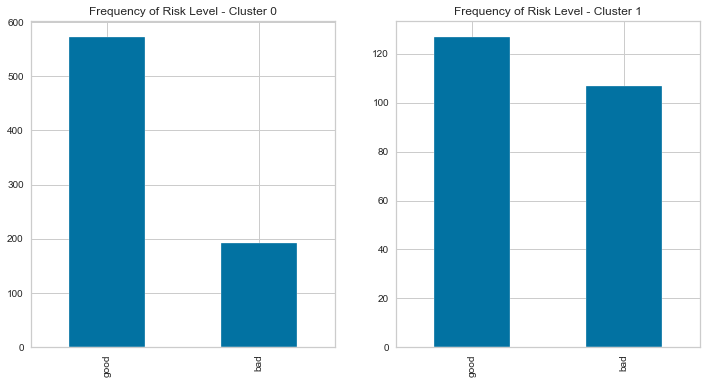

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Frequency of Risk Level - Cluster 0')

df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Frequency of Risk Level - Cluster 1')

plt.show()




### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [64]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def range_query(X, point_index, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[i], X[point_index]) <= eps:
            neighbors.append(i)
    return neighbors

def dbscan(X, eps, min_samples):
    labels = [0]*len(X)
    cluster = 0
    for i in range(len(X)):
        if labels[i] != 0:
            continue
        neighbors = range_query(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1
            continue
        cluster += 1
        labels[i] = cluster
        for j in neighbors:
            if labels[j] == -1:
                labels[j] = cluster
            if labels[j] != 0:
                continue
            labels[j] = cluster
            new_neighbors = range_query(X, j, eps)
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
    return labels



In [78]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Define different values for eps and min_samples parameters
eps_values = [0.75,1.0, 1.5, 2.0]
min_samples_values = [5, 10, 20,25]

for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN algorithm with current values of eps and min_samples
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan_model.fit_predict(standardized_data)
        
        # Create a dataframe with cluster labels
        result = pd.DataFrame(cluster_labels, columns=['clusters'])
        
        # Print the counts of data points in each cluster
        print(f"Results for eps={eps} and min_samples={min_samples}:")
        print(result['clusters'].value_counts())


Results for eps=0.75 and min_samples=5:
 0    604
 1    179
-1    103
 2     96
 5      7
 4      6
 3      5
Name: clusters, dtype: int64
Results for eps=0.75 and min_samples=10:
 1    589
 0    176
-1    153
 2     82
Name: clusters, dtype: int64
Results for eps=0.75 and min_samples=20:
 1    556
-1    226
 0    163
 2     55
Name: clusters, dtype: int64
Results for eps=0.75 and min_samples=25:
 1    521
-1    270
 0    159
 2     50
Name: clusters, dtype: int64
Results for eps=1.0 and min_samples=5:
 0    619
 1    190
 2    121
-1     60
 3     10
Name: clusters, dtype: int64
Results for eps=1.0 and min_samples=10:
 0    611
 1    186
 2    108
-1     95
Name: clusters, dtype: int64
Results for eps=1.0 and min_samples=20:
 1    594
 0    181
-1    138
 2     87
Name: clusters, dtype: int64
Results for eps=1.0 and min_samples=25:
 1    591
 0    179
-1    148
 2     82
Name: clusters, dtype: int64
Results for eps=1.5 and min_samples=5:
 0    629
 1    198
 2    144
 3     18
-1     

### Difference from Kmeans clustering and DBScan clustering

DBSCAN is more efficient than K-means for large datasets with irregular or non-convex clusters because it does not require specifying the number of clusters in advance and can detect noise points that do not belong to any cluster. DBSCAN also tends to be more robust to outliers compared to K-means. In our dataset, 95 credit profiles are observed as outliers


#####  Fitting the data using KMeans first assuming a large number of well-defined, spherical clusters, and low-dimensional data. 



In [15]:

from sklearn.model_selection import train_test_split

df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk', 'Clusters']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]


#### Logistic Regression for PD Estimation

In [18]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['Risk']
smote = SMOTEENN(random_state = 2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())


Optimization terminated successfully.
         Current function value: 0.444792
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  371
Model:                          Logit   Df Residuals:                      367
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                  0.3546
Time:                        13:05:50   Log-Likelihood:                -165.02
converged:                       True   LL-Null:                       -255.69
Covariance Type:            nonrobust   LLR p-value:                 4.529e-39
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               1.6110      0.189      8.542      0.000       1.241       1.981
Job               0.

In [19]:
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]                                                           
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters == 1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)



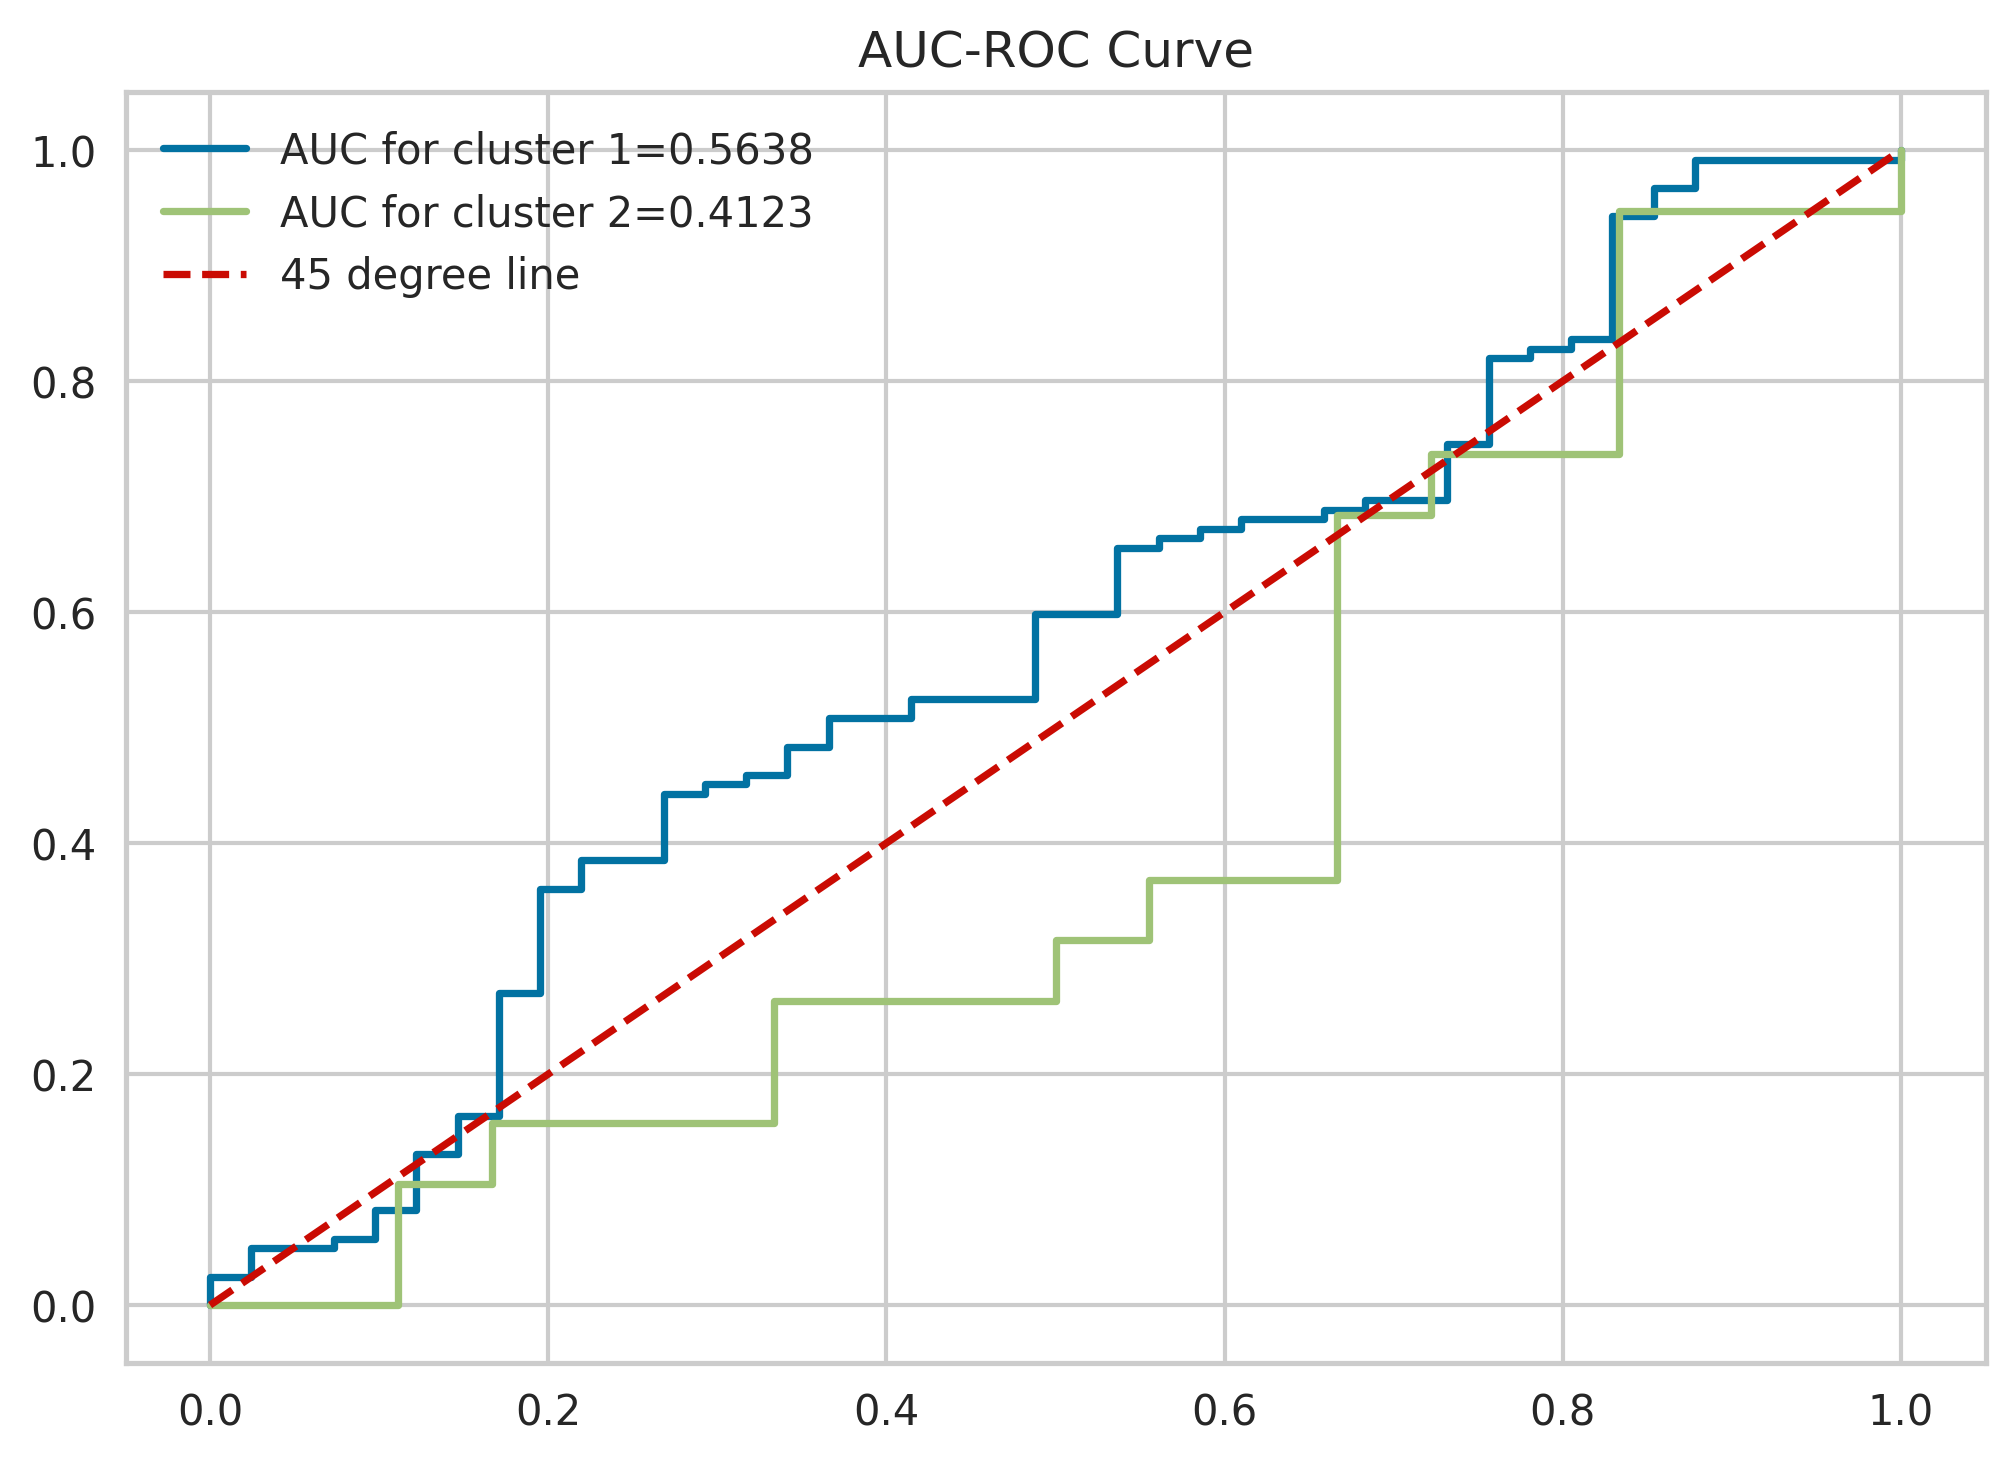

In [20]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos, true_pos, label="AUC for cluster 1={:.4f} "
         .format(auc))

false_pos, true_pos, _ = roc_curve(y_test2.values, pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos, true_pos, label="AUC for cluster 2={:.4f} "
         .format(auc))

plt.plot([0, 1], [0, 1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve')
plt.show()


#### Bayesian Approach for PD Estimation

In [23]:
import pymc3 as pm
import arviz as az

In [24]:
with pm.Model() as logistic_model1:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p1 = pm.Deterministic('p', pm.math.sigmoid(beta_age * 
                              X_train1['Age'] + beta_job *
                              X_train1['Job'] + beta_credit *
                              X_train1['Credit amount'] + beta_dur *
                              X_train1['Duration']))
    observed1 = pm.Bernoulli("risk", p1, observed=y_train1)
    map_estimate1 = pm.find_MAP()

param_list = ['coeff_age', 'coeff_job', 'coeff_credit_amount', 'coeff_duration']
params1 = {}
for i in param_list:
    params1[i] = [np.round(map_estimate1[i], 6)]
    
bayesian_params1 = pd.DataFrame.from_dict(params1)
print('The result of Bayesian estimation for cluster 1:\n {}'.format(bayesian_params1))

with pm.Model() as logistic_model2:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p2 = pm.Deterministic('p', pm.math.sigmoid(beta_age *
                              second_cluster_train['Age'] + 
                              beta_job * second_cluster_train['Job'] + 
                              beta_credit * second_cluster_train['Credit amount'] + 
                              beta_dur * second_cluster_train['Duration']))
    observed2 = pm.Bernoulli("risk", p2,
                            observed=y_train[y_train.Clusters == 1]
                            ['Risk'])
    map_estimate2 = pm.find_MAP()

param_list = [ 'coeff_age', 'coeff_job', 'coeff_credit_amount', 'coeff_duration']
params2 = {}
for i in param_list:
    params2[i] = [np.round(map_estimate2[i], 6)]
    
bayesian_params2 = pd.DataFrame.from_dict(params2)
print('The result of Bayesian estimation for cluster 2:\n {}'.format(bayesian_params2))




The result of Bayesian estimation for cluster 1:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   1.610056   0.505535             1.496773       -1.679486



The result of Bayesian estimation for cluster 2:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.028747   0.152289            -0.104812        0.095585


### Markov Chain for PD Estimation


In [25]:
import logging
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

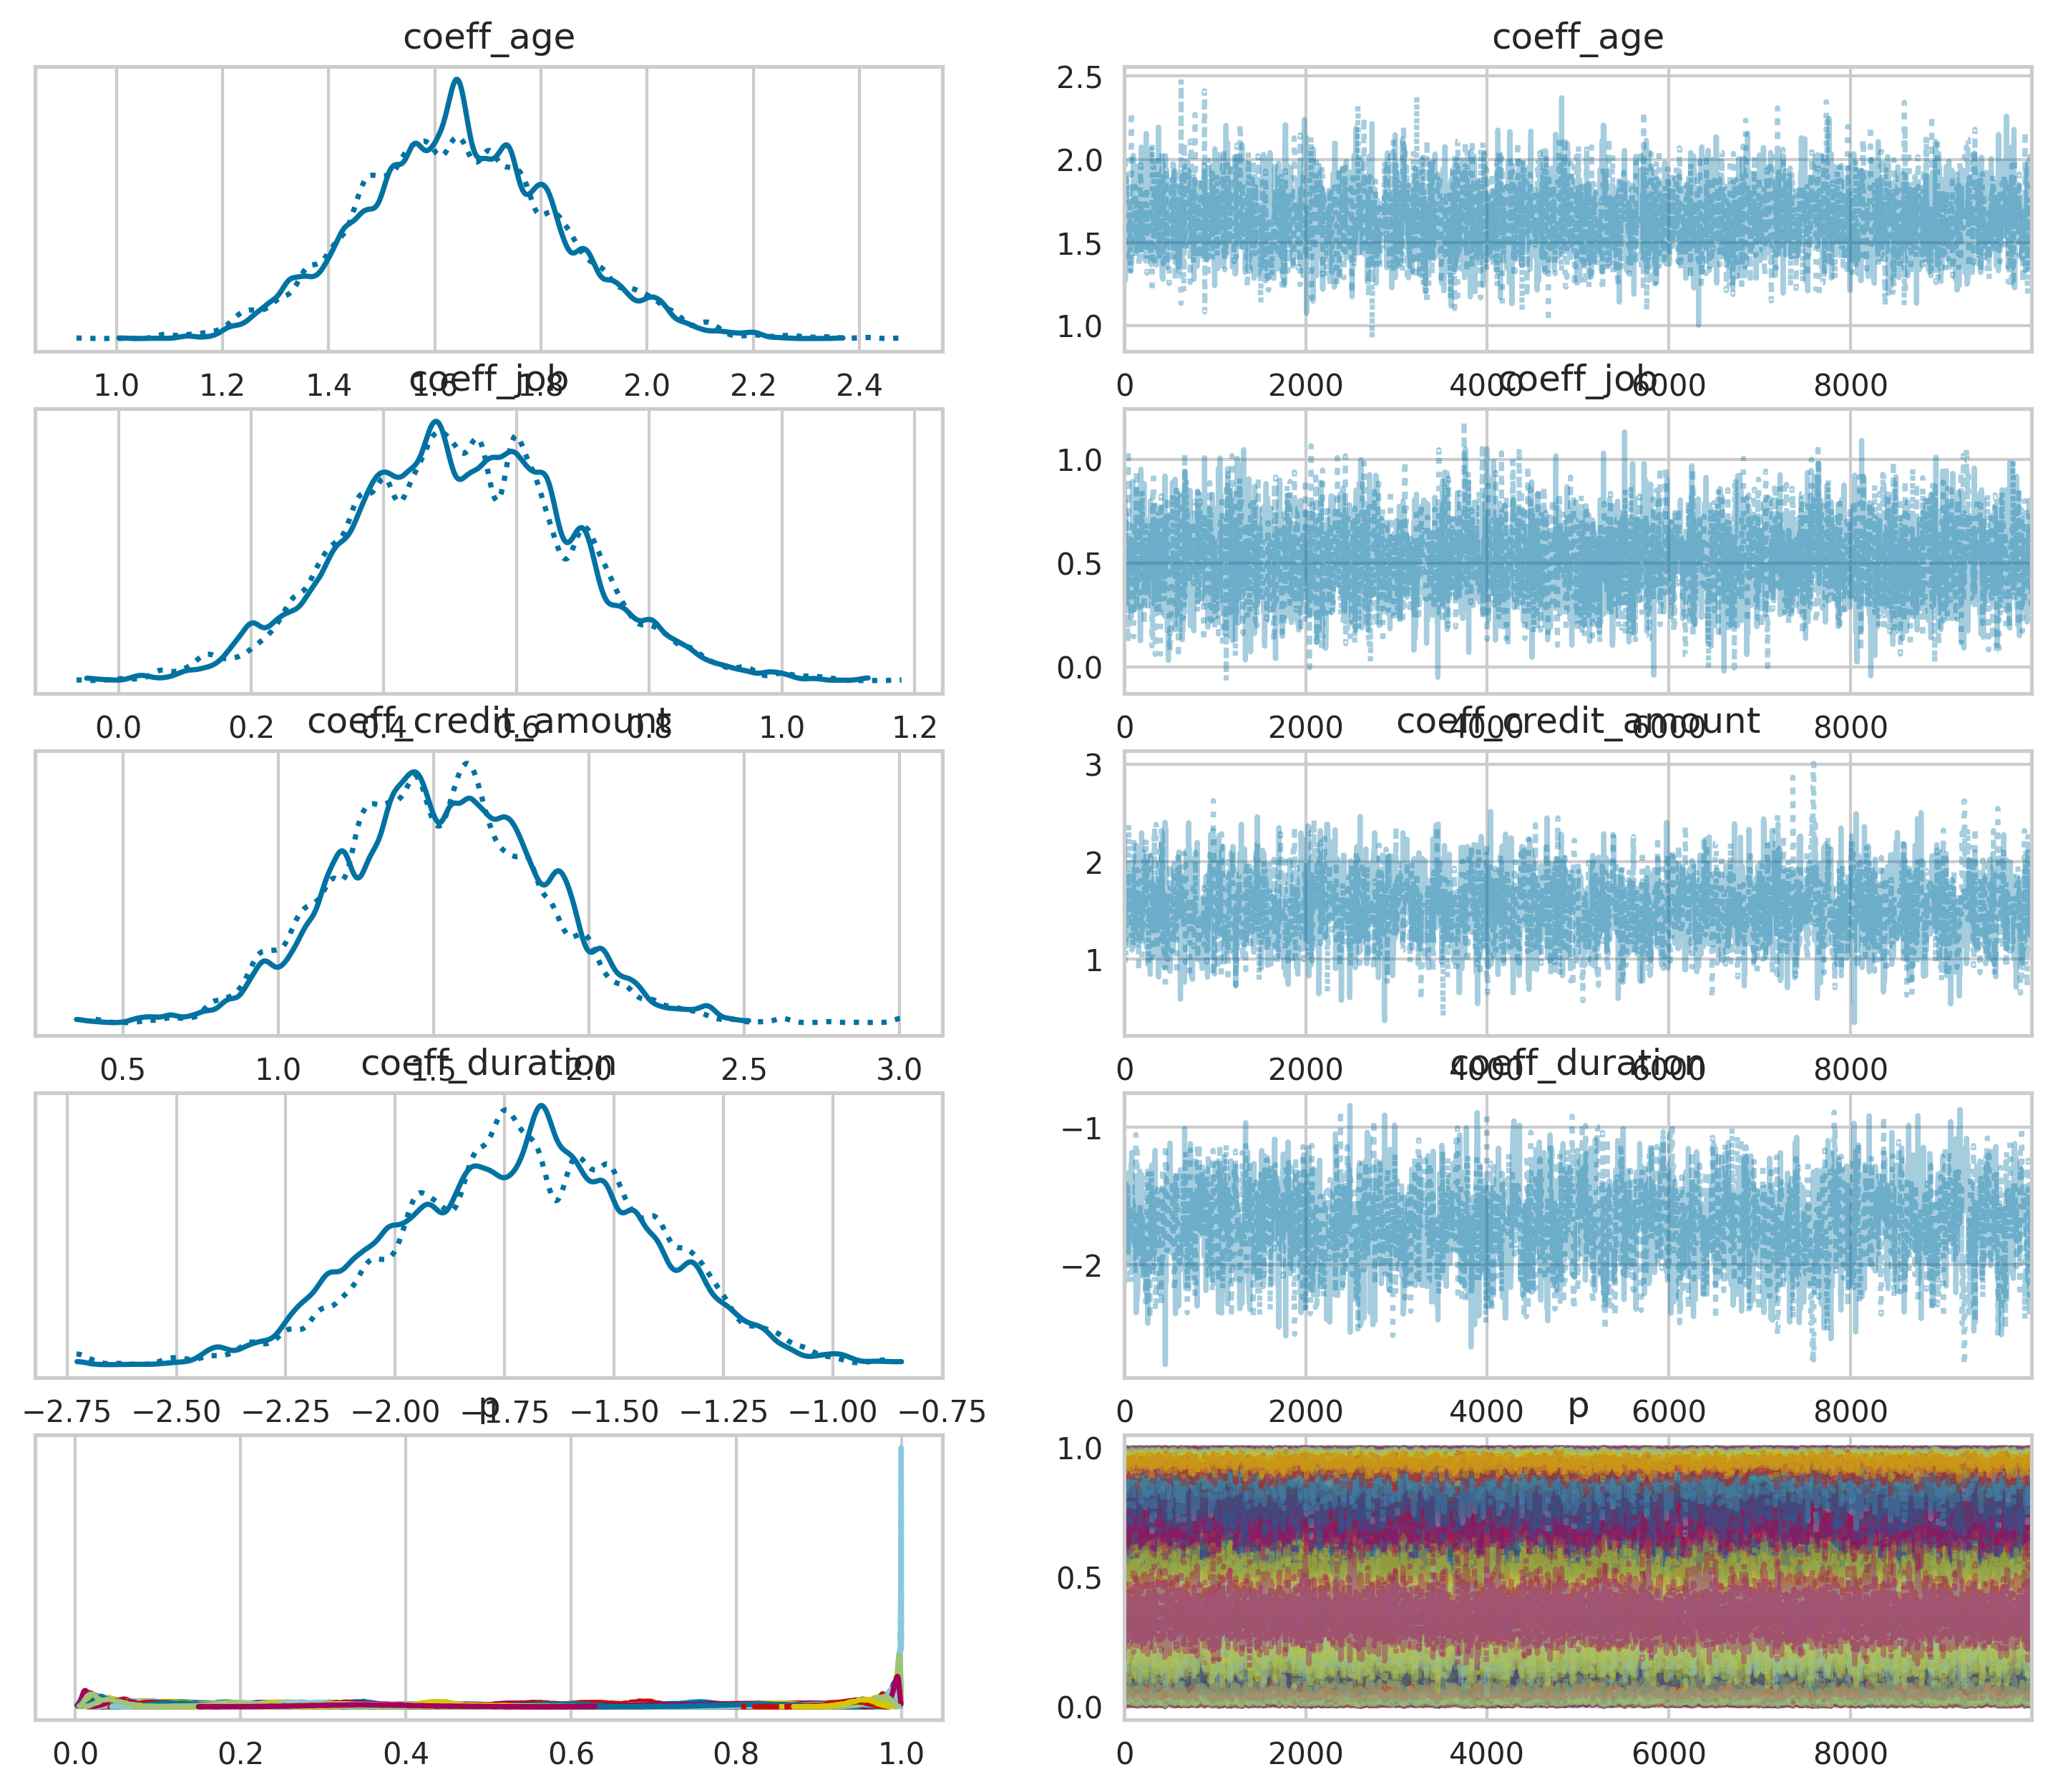

mean        sd    hdi_3%   hdi_97%  mcse_mean  \
coeff_age            1.645503  0.188792  1.316231  2.029320   0.003986   
coeff_job            0.515682  0.168708  0.198064  0.831446   0.003187   
coeff_credit_amount  1.516621  0.324014  0.902696  2.092603   0.008834   
coeff_duration      -1.709856  0.283438 -2.256459 -1.212960   0.008328   

                      mcse_sd     ess_bulk     ess_tail     r_hat  
coeff_age            0.002819  2246.881582  2699.135691  1.001431  
coeff_job            0.002271  2816.388795  3254.532867  0.999981  
coeff_credit_amount  0.006378  1360.639000  2337.036041  1.001713  
coeff_duration       0.005981  1169.730911  1731.897546  1.002000

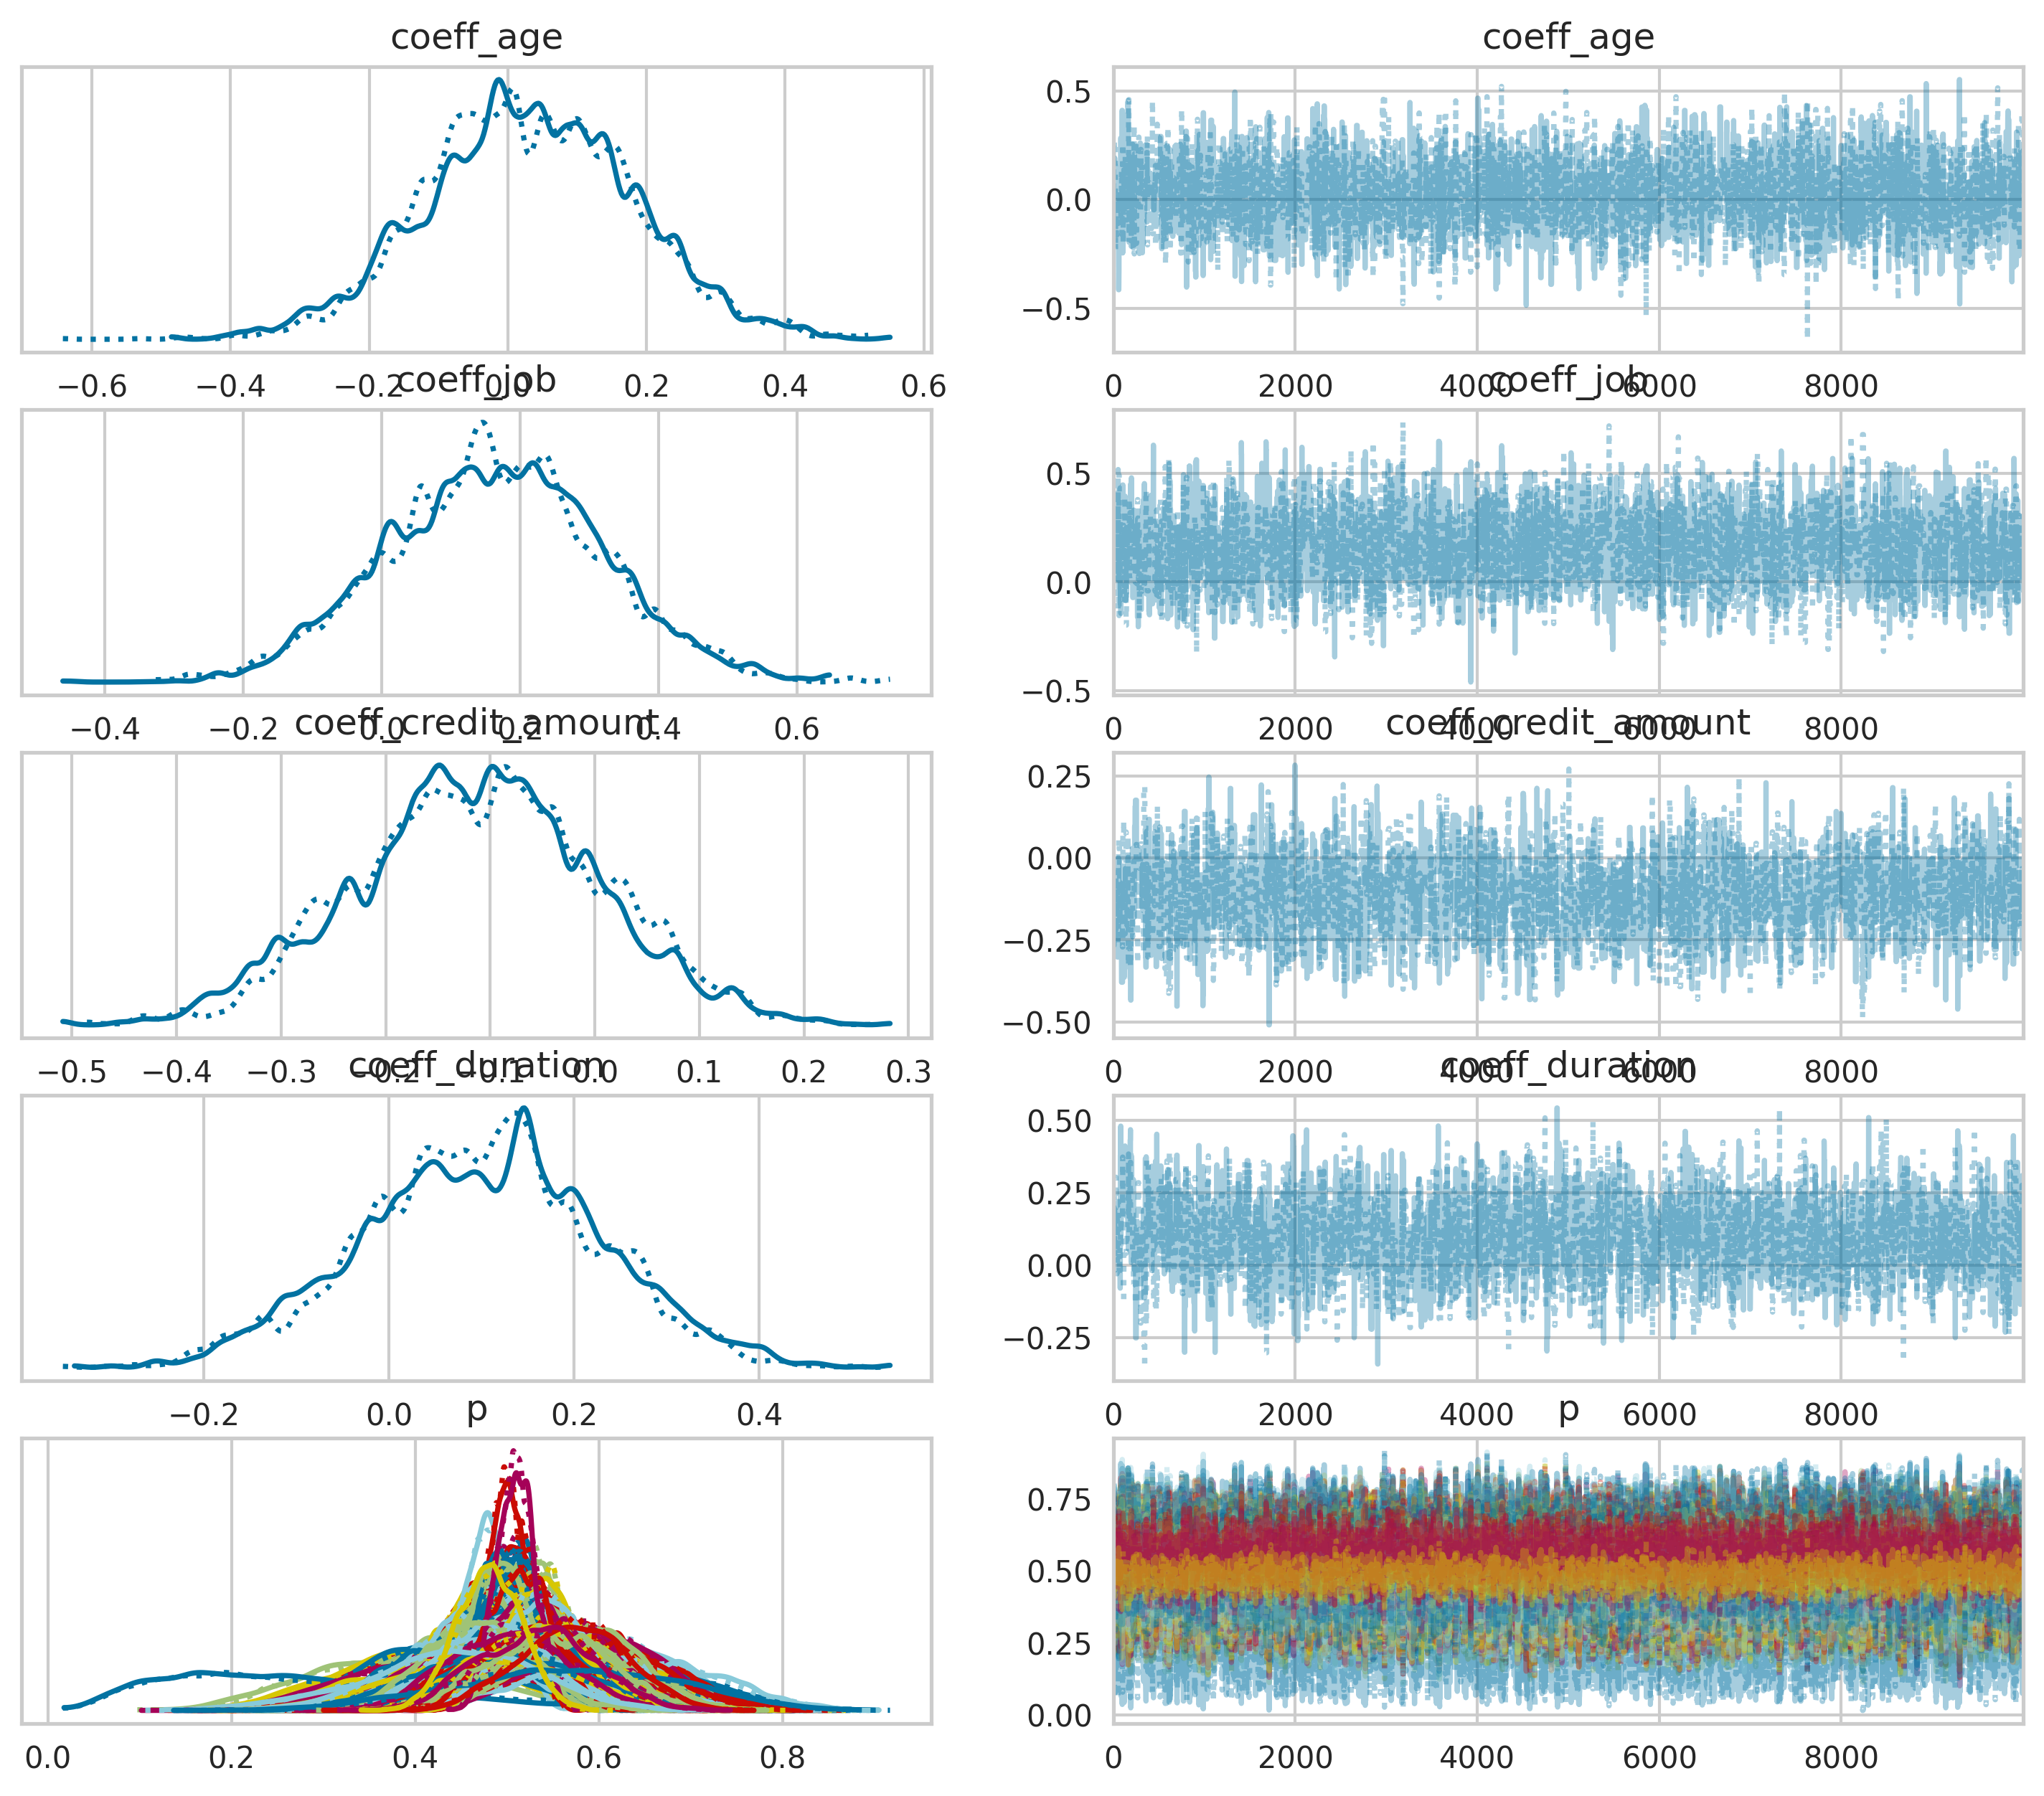

mean        sd    hdi_3%   hdi_97%  mcse_mean  \
coeff_age            0.031563  0.148750 -0.239390  0.314166   0.003005   
coeff_job            0.162934  0.154461 -0.131166  0.446511   0.003380   
coeff_credit_amount -0.112391  0.115465 -0.334089  0.093415   0.003369   
coeff_duration       0.098215  0.127274 -0.141213  0.340559   0.003680   

                      mcse_sd     ess_bulk     ess_tail     r_hat  
coeff_age            0.002208  2457.857808  2701.905329  1.000347  
coeff_job            0.002391  2088.764807  2844.264252  1.000401  
coeff_credit_amount  0.002383  1178.337450  1833.810801  1.003416  
coeff_duration       0.002602  1200.888227  1627.410544  1.004715

In [26]:
import logging
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

# Set logging level to error for pymc3
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

# Define and sample from logistic_model1
with logistic_model1:
    # Use Metropolis as the step method for the sampler
    step = pm.Metropolis()
    # Run the sampler and generate the trace
    trace1 = pm.sample(10000, step=step, progressbar=False)
    
    # Plot the trace
    az.plot_trace(trace1)
    plt.show()
    
    # Display summary statistics for the trace
    display(az.summary(trace1, round_to=6)[:4])

# Define and sample from logistic_model2
with logistic_model2:
    # Use Metropolis as the step method for the sampler
    step = pm.Metropolis()
    # Run the sampler and generate the trace
    trace2 = pm.sample(10000, step=step, progressbar=False)
    
    # Plot the trace
    az.plot_trace(trace2)
    plt.show()
    
    # Display summary statistics for the trace
    display(az.summary(trace2, round_to=6)[:4])


####  SVC for PD Estimation

In [22]:
# Separate data based on clusters
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]



from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import roc_auc_score
import time

kernel1 = ('linear', 'rbf', 'poly')
kernel2 = ('linear', 'sigmoid')

param_svc1 = {
    'gamma': [1e-6, 1e-2],
    'C': [0.001, 0.09, 1, 5, 10],
    'kernel': kernel1
}

param_svc2 = {
    'gamma': [1e-6, 1e-2],
    'C': [0.001, 0.09, 1, 5, 10],
    'kernel': kernel2
}

svc1 = SVC(class_weight='balanced')
svc2 = SVC(class_weight='balanced')

halve_SVC1 = HalvingRandomSearchCV(estimator=svc1, param_distributions=param_svc1, 
                                  scoring='roc_auc', n_jobs=-1, random_state=42)

halve_SVC2 = HalvingRandomSearchCV(estimator=svc2, param_distributions=param_svc2, 
                                  scoring='roc_auc', n_jobs=-1, random_state=42)

for i, (X_train, y_train, X_test, y_test, halve_SVC, kernel) in enumerate(zip(
        [X_train1, X_train2], [y_train1, y_train2], [X_test1, X_test2], [y_test1, y_test2], 
        [halve_SVC1, halve_SVC2], [kernel1, kernel2]), start=1):
    
    print(f"\nTraining for cluster {i}")
    start_time = time.time()
    halve_SVC.set_params(param_distributions={'kernel': kernel})
    halve_SVC.fit(X_train, y_train)
    print(f'Best hyperparameters for cluster {i} in SVC: {halve_SVC.best_params_} with ROC AUC score of {halve_SVC.best_score_:.4f}')
    y_pred = halve_SVC.predict(X_test)
    print(f'The ROC AUC score of SVC for cluster {i} is {roc_auc_score(y_test, y_pred):.4f}')
    print(f"Training took {time.time() - start_time:.2f} seconds.\n")





Training for cluster 1
Best hyperparameters for cluster 1 in SVC: {'kernel': 'rbf'} with ROC AUC score of 0.8371
The ROC AUC score of SVC for cluster 1 is 0.5181
Training took 2.08 seconds.


Training for cluster 2
Best hyperparameters for cluster 2 in SVC: {'kernel': 'linear'} with ROC AUC score of 0.6500
The ROC AUC score of SVC for cluster 2 is 0.5102
Training took 0.04 seconds.



### RF for PD Estimation

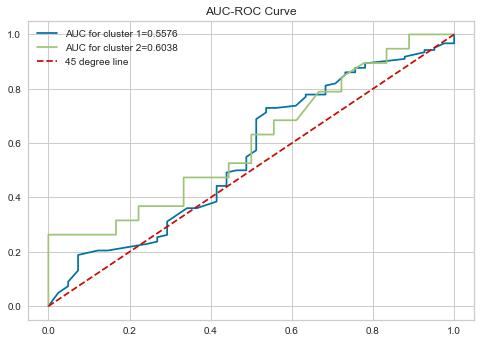

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

# Separate data based on clusters
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

# Resample using SMOTEENN
smote = SMOTEENN(random_state=2)
X_train1, y_train1 = smote.fit_resample(first_cluster_train, y_train[y_train.Clusters == 0]['Risk'].ravel())
X_train2, y_train2 = smote.fit_resample(second_cluster_train, y_train[y_train.Clusters == 1]['Risk'].ravel())

# Train random forest models on each cluster
rfc1 = RandomForestClassifier(random_state=2)
rfc1.fit(X_train1, y_train1)

rfc2 = RandomForestClassifier(random_state=2)
rfc2.fit(X_train2, y_train2)

# Predict probabilities on test set
pred_prob1 = rfc1.predict_proba(first_cluster_test)[:, 1]
pred_prob2 = rfc2.predict_proba(second_cluster_test)[:, 1]

# Plot AUC-ROC curves
false_pos, true_pos, _ = roc_curve(y_test[y_test.Clusters == 0]['Risk'].values, pred_prob1)
auc = roc_auc_score(y_test[y_test.Clusters == 0]['Risk'], pred_prob1)
plt.plot(false_pos, true_pos, label="AUC for cluster 1={:.4f}".format(auc))

false_pos, true_pos, _ = roc_curve(y_test[y_test.Clusters == 1]['Risk'].values, pred_prob2)
auc = roc_auc_score(y_test[y_test.Clusters == 1]['Risk'], pred_prob2)
plt.plot(false_pos, true_pos, label="AUC for cluster 2={:.4f}".format(auc))

plt.plot([0, 1], [0, 1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve')
plt.show()



#### XGBoost for PD Estimation¶

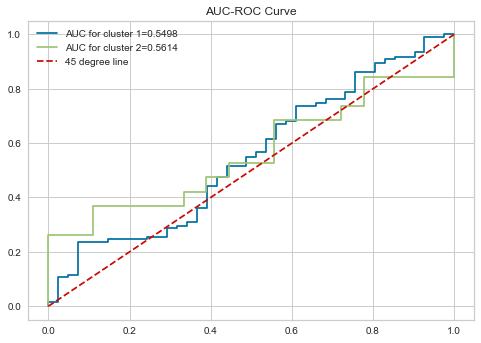

In [26]:
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

# Separate data based on clusters
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

# Resample using SMOTEENN
smote = SMOTEENN(random_state=2)
X_train1, y_train1 = smote.fit_resample(first_cluster_train, y_train[y_train.Clusters == 0]['Risk'].ravel())
X_train2, y_train2 = smote.fit_resample(second_cluster_train, y_train[y_train.Clusters == 1]['Risk'].ravel())

# Train XGBoost models on each cluster
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.3,
    'seed': 2
}
num_rounds = 100
dtrain1 = xgb.DMatrix(X_train1, label=y_train1)
xgb1 = xgb.train(params, dtrain1, num_rounds)

dtrain2 = xgb.DMatrix(X_train2, label=y_train2)
xgb2 = xgb.train(params, dtrain2, num_rounds)

# Predict probabilities on test set
dtest1 = xgb.DMatrix(first_cluster_test)
pred_prob1 = xgb1.predict(dtest1)

dtest2 = xgb.DMatrix(second_cluster_test)
pred_prob2 = xgb2.predict(dtest2)

# Plot AUC-ROC curves
false_pos, true_pos, _ = roc_curve(y_test[y_test.Clusters == 0]['Risk'].values, pred_prob1)
auc = roc_auc_score(y_test[y_test.Clusters == 0]['Risk'], pred_prob1)
plt.plot(false_pos, true_pos, label="AUC for cluster 1={:.4f}".format(auc))

false_pos, true_pos, _ = roc_curve(y_test[y_test.Clusters == 1]['Risk'].values, pred_prob2)
auc = roc_auc_score(y_test[y_test.Clusters == 1]['Risk'], pred_prob2)
plt.plot(false_pos, true_pos, label="AUC for cluster 2={:.4f}".format(auc))

plt.plot([0, 1], [0, 1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve')
plt.show()

### NN for PD Estimation

In [28]:
from sklearn.neural_network import MLPClassifier

param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
            "solver": ["lbfgs", "sgd", "adam"], 
            "learning_rate_init": [0.001, 0.05]}

MLP = MLPClassifier(random_state=42)
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,
                                       scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

y_pred_NN1 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_NN1)))


param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in NN are {}'.
      format(param_halve_NN.best_params_))

y_pred_NN2 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for second cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_NN2)))



Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50, 50)}
The ROC AUC score of NN for first cluster is 0.5386
Best hyperparameters for second cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10, 100)}
The ROC AUC score of NN for second cluster is 0.6213


### DL for PD Estimation


In [27]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal', 
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model


parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
             'dropout_rate':[0.2, 0.4]}
model = KerasClassifier(build_fn = DL_risk)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))


model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))



gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.
      format(gs.best_params_))

model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate= gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2 =  model.predict(X_test2)
DL_ROC_AUC = roc_auc_score(y_test2, DL_predict2.flatten()) 
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))


2023-03-09 13:11:20.355703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 13:11:20.607308: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 13:11:20.607357: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-09 13:11:21.585039: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

3/3 [==============================] - 0s 2ms/step
Best hyperparameters for first cluster in DL are {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 50}
6/6 [==============================] - 0s 3ms/step
DL_ROC_AUC is 0.5102
2/2 [==============================] - 0s 3ms/step
Best parameters for second cluster in DL are {'batch_size': 100, 'dropout_rate': 0.4, 'epochs': 150}
2/2 [==============================] - 0s 4ms/step
DL_ROC_AUC is 0.6711


In [35]:
df_scaled['clusters_1'] = result['clusters']

In [36]:
df_scaled

Age       Job  Credit amount  Duration  Clusters  Risk  clusters_1
0    2.766456  0.146949      -0.745131 -1.236478         0     1           1
1   -1.191404  0.146949       0.949817  2.248194         1     0           1
2    1.183312 -1.383771      -0.416562 -0.738668         0     1           2
3    0.831502  0.146949       1.634247  1.750384         1     1           1
4    1.535122  0.146949       0.566664  0.256953         0     0           1
..        ...       ...            ...       ...       ...   ...         ...
995 -0.399832 -1.383771      -0.544162 -0.738668         0     1           2
996  0.391740  1.677670       0.207612  0.754763         1     1           3
997  0.215835  0.146949      -0.874503 -0.738668         0     1           1
998 -1.103451  0.146949      -0.505528  1.999289         1     0           1
999 -0.751642  0.146949       0.462457  1.999289         1     1           1

[1000 rows x 7 columns]

In [42]:

from sklearn.model_selection import train_test_split

df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

X = df_scaled.drop('Risk', axis=1)
X = df_scaled.drop('Clusters', axis=1)
y = df_scaled.loc[:, ['Risk','clusters_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

first_cluster_train = X_train[X_train.clusters_1 == 1].iloc[:, :-1]
second_cluster_train = X_train[X_train.clusters_1 == 2].iloc[:, :-1]

third_cluster_train = X_train[X_train.clusters_1 == 3].iloc[:, :-1]
fourth_cluster_train = X_train[X_train.clusters_1 ==-1].iloc[:, :-1]


In [43]:
first_cluster_train.shape,second_cluster_train.shape,third_cluster_train.shape,fourth_cluster_train.shape

((491, 5), (138, 5), (95, 5), (76, 5))

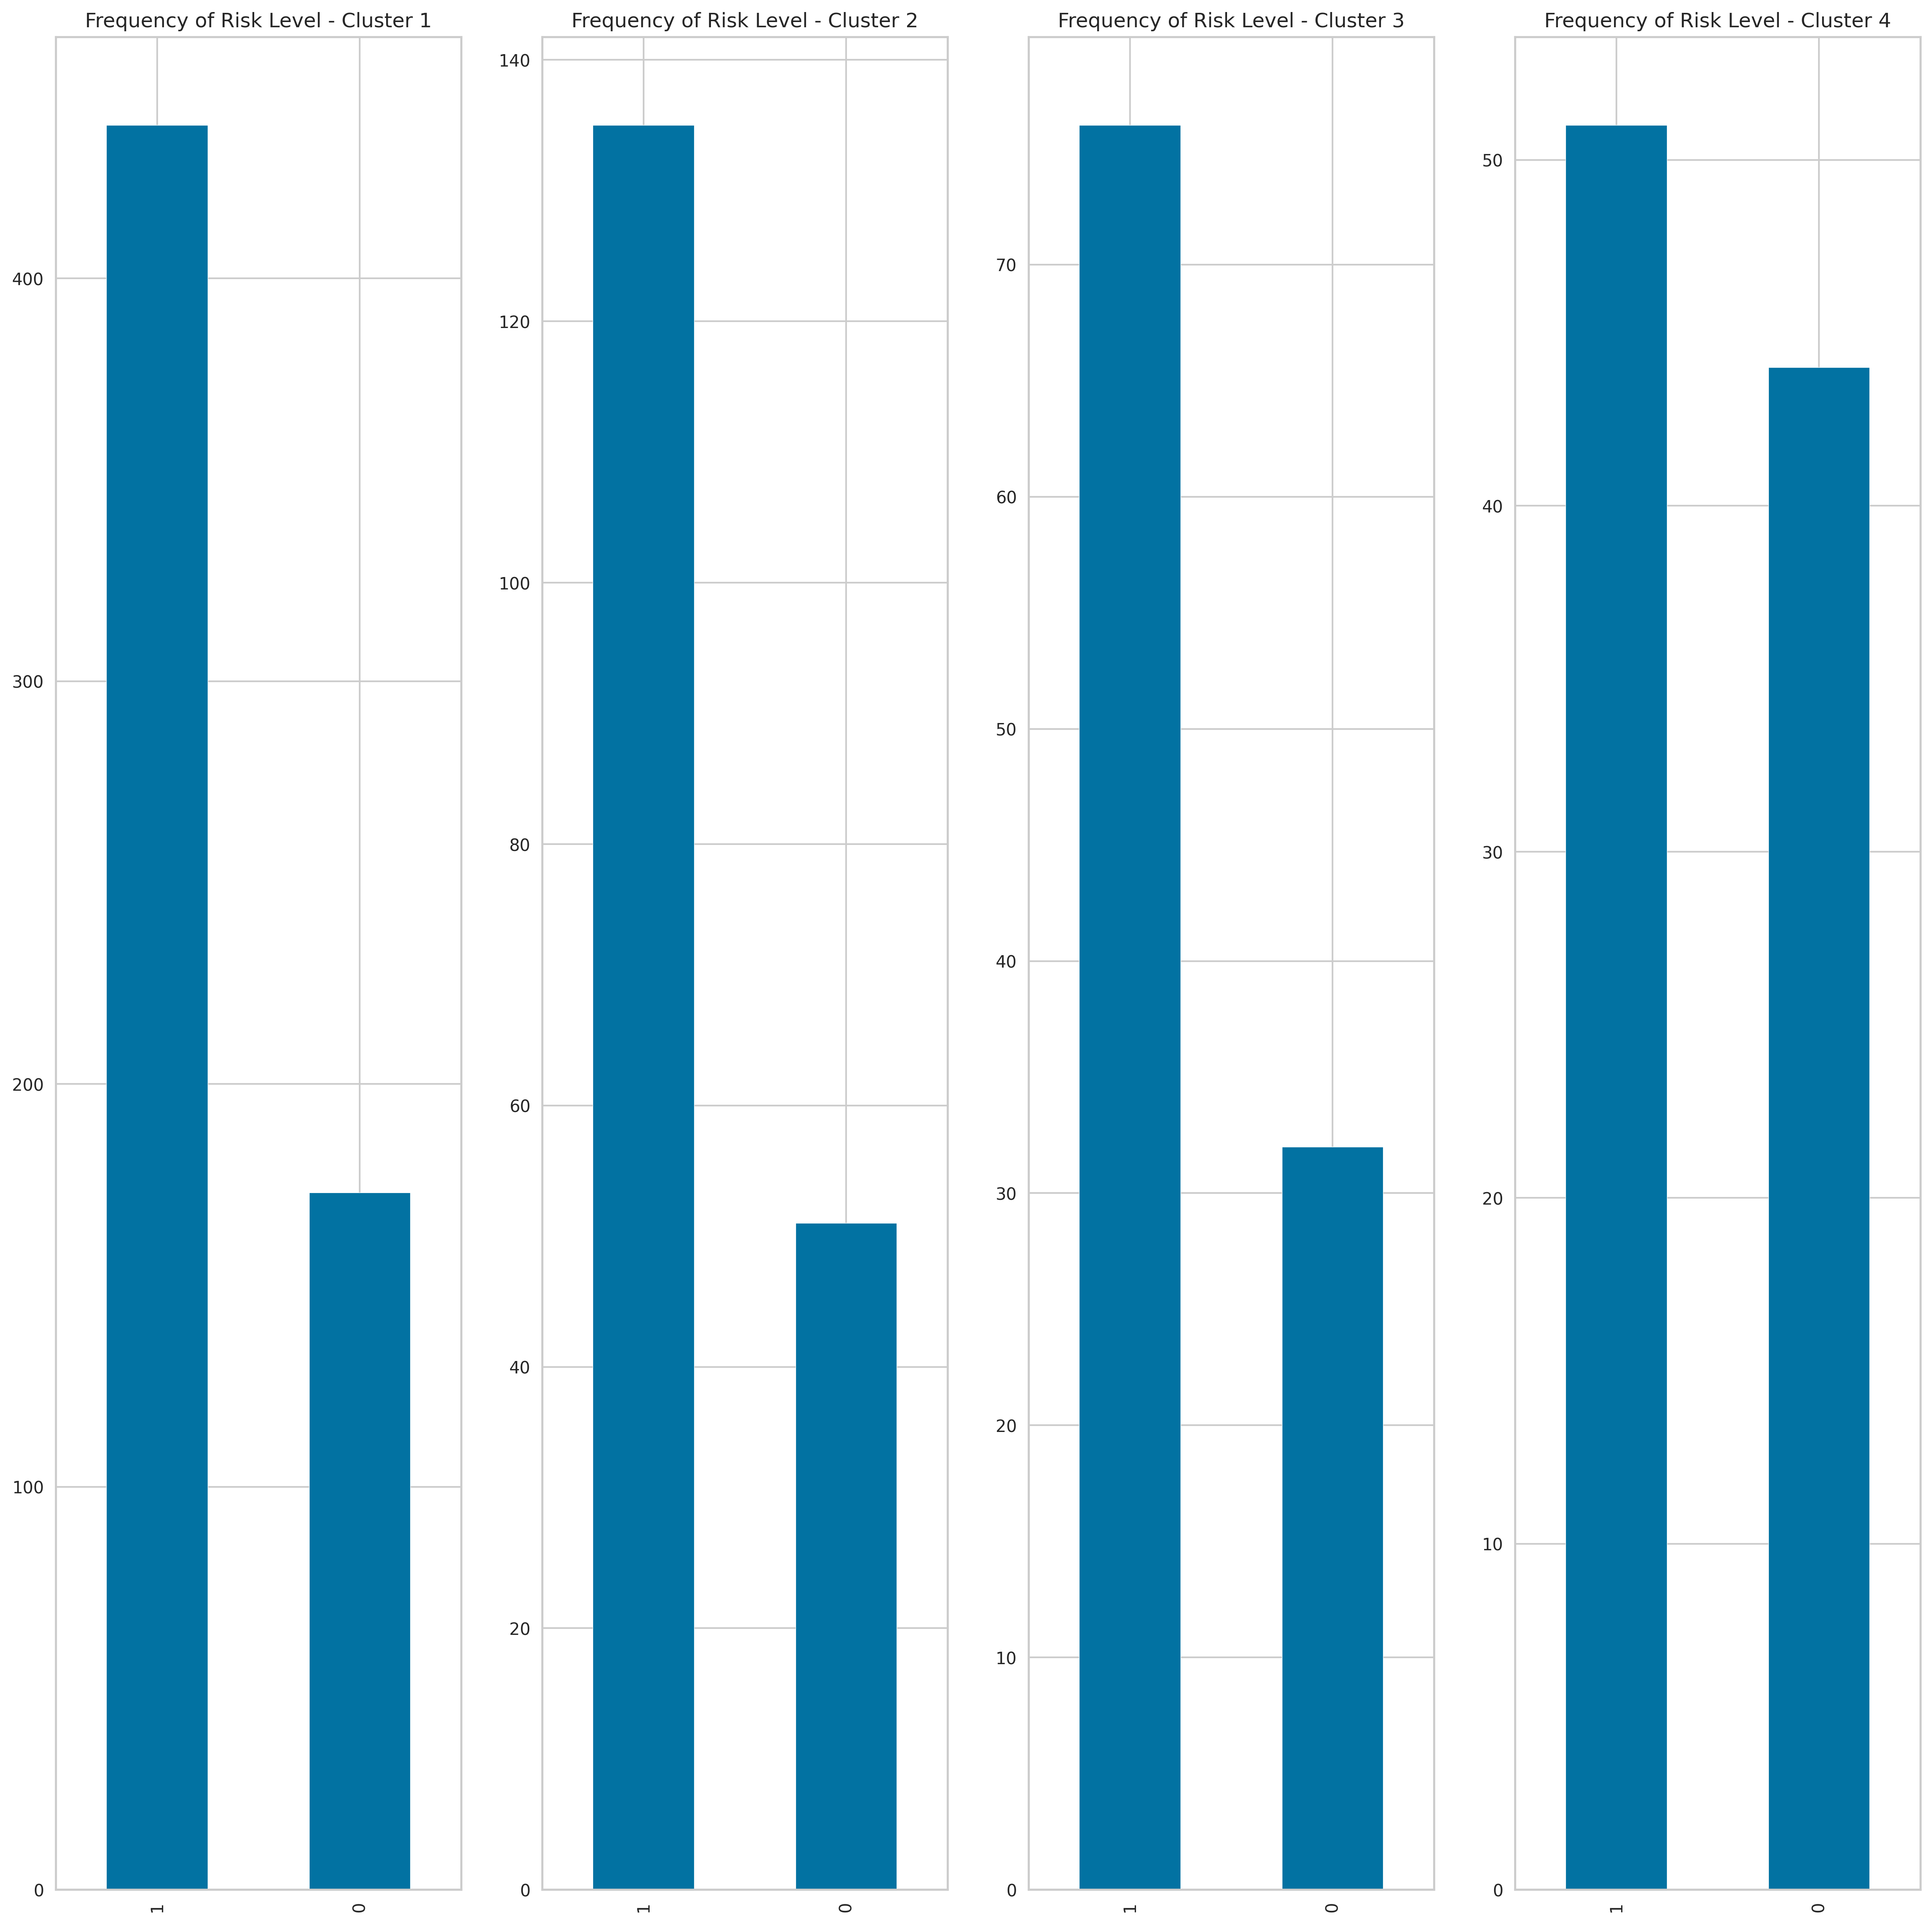

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,20))

df_scaled[df_scaled.clusters_1  == 1]['Risk'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Frequency of Risk Level - Cluster 1')

df_scaled[df_scaled.clusters_1  == 2]['Risk'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Frequency of Risk Level - Cluster 2')

df_scaled[df_scaled.clusters_1  == 3]['Risk'].value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Frequency of Risk Level - Cluster 3')

df_scaled[df_scaled.clusters_1  == -1]['Risk'].value_counts().plot(kind='bar', ax=axs[3])
axs[3].set_title('Frequency of Risk Level - Cluster 4')

plt.show()

In [60]:
X_train

Age       Job  Credit amount  Duration  Risk  clusters_1
29   2.414647  0.146949       1.263499  3.243815     0          -1
535 -0.223927  0.146949      -0.337522  0.008048     0           1
695  1.271265  0.146949      -0.721384 -1.236478     1           1
557 -0.575737  0.146949       0.613804  0.008048     0           1
836 -1.279356  0.146949      -0.845439 -0.738668     1           1
..        ...       ...            ...       ...   ...         ...
106  0.303788  1.677670       1.129520 -0.240857     0           3
270 -0.311879  0.146949      -0.215947 -0.240857     1           1
860 -0.751642  0.146949       0.897714  0.256953     1           1
435 -0.927547  0.146949      -0.633482 -0.738668     0           1
102 -1.015499  0.146949      -0.829134 -1.236478     1           1

[800 rows x 6 columns]

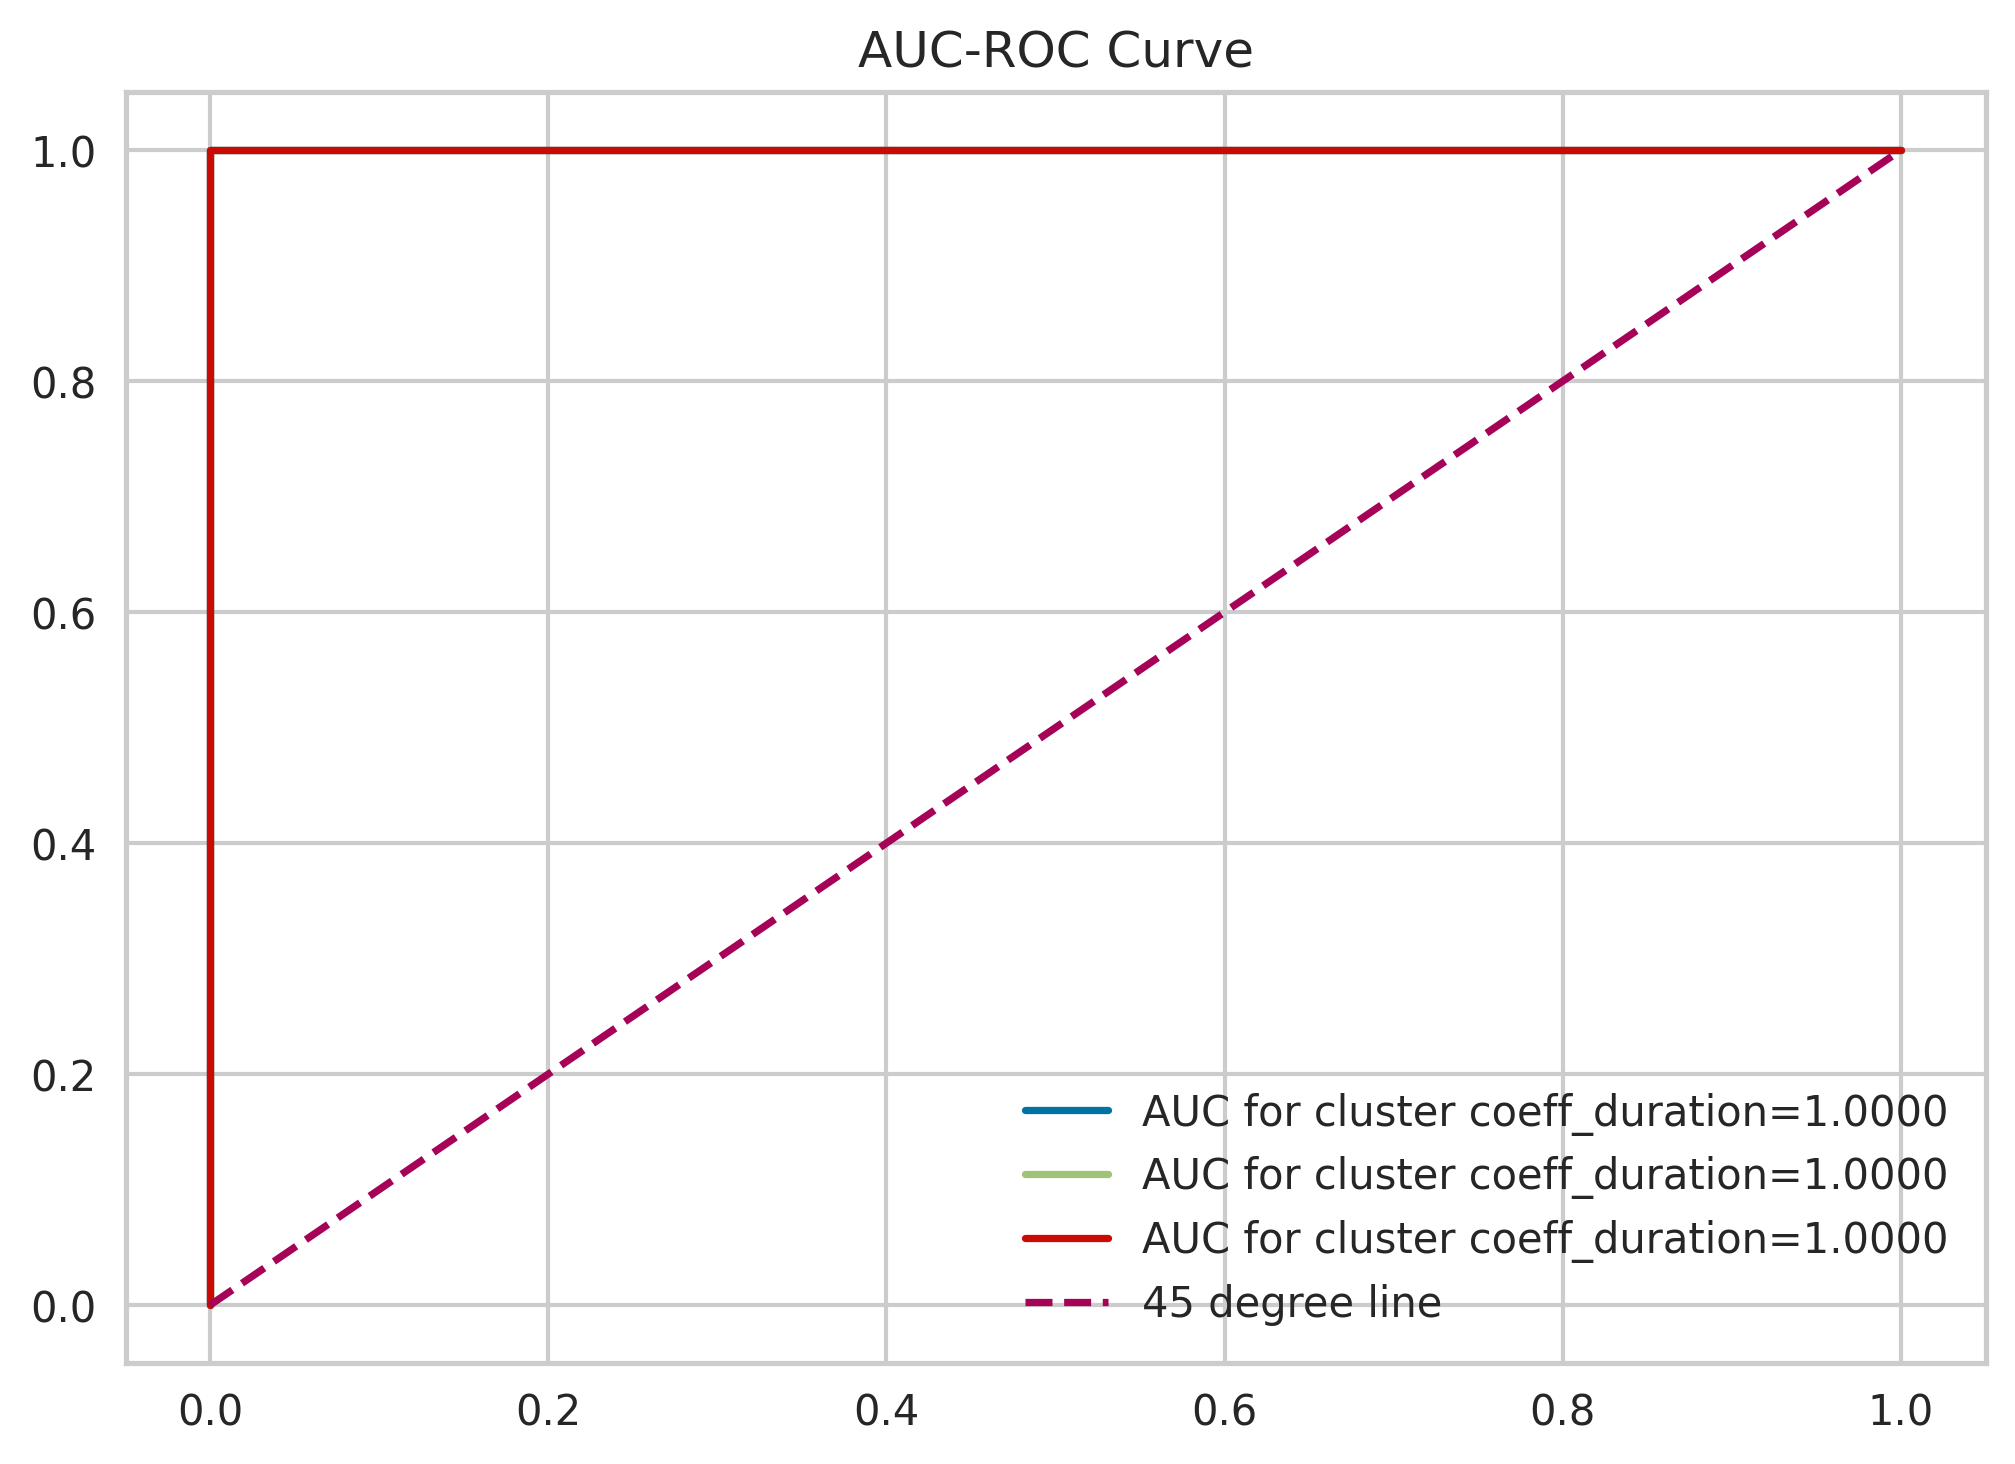

In [84]:
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

# Separate data based on clusters
first_cluster_train = X_train[X_train.clusters_1 == 1].iloc[:, :-1]
second_cluster_train = X_train[X_train.clusters_1 == 2].iloc[:, :-1]
third_cluster_train = X_train[X_train.clusters_1 == 3].iloc[:, :-1]
fourth_cluster_train = X_train[X_train.clusters_1 == -1].iloc[:, :-1]

first_cluster_test = X_test[X_test.clusters_1 == 1].iloc[:, :-1]
second_cluster_test = X_test[X_test.clusters_1 == 2].iloc[:, :-1]
third_cluster_test = X_test[X_test.clusters_1 == 3].iloc[:, :-1]
fourth_cluster_test = X_test[X_test.clusters_1 == -1].iloc[:, :-1]

# Resample using SMOTEENN
smote = SMOTEENN(random_state=2)
X_train1, y_train1 = smote.fit_resample(first_cluster_train, y_train[y_train.clusters_1 == 1]['Risk'].ravel())
X_train2, y_train2 = smote.fit_resample(second_cluster_train, y_train[y_train.clusters_1 == 2]['Risk'].ravel())
X_train3, y_train3 = smote.fit_resample(third_cluster_train, y_train[y_train.clusters_1 == 3]['Risk'].ravel())
X_train4, y_train4 = smote.fit_resample(fourth_cluster_train, y_train[y_train.clusters_1 == -1]['Risk'].ravel())

# Train XGBoost models on each cluster
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.3,
    'seed': 2
}
num_rounds = 100
dtrain1 = xgb.DMatrix(X_train1, label=y_train1)
xgb1 = xgb.train(params, dtrain1, num_rounds)

dtrain2 = xgb.DMatrix(X_train2, label=y_train2)
xgb2 = xgb.train(params, dtrain2, num_rounds)

dtrain3 = xgb.DMatrix(X_train3, label=y_train3)
xgb3 = xgb.train(params, dtrain3, num_rounds)

dtrain4 = xgb.DMatrix(X_train4, label=y_train4)
xgb4 = xgb.train(params, dtrain4, num_rounds)

# Predict probabilities on test set
dtest1 = xgb.DMatrix(first_cluster_test)
pred_prob1 = xgb1.predict(dtest1)

dtest2 = xgb.DMatrix(second_cluster_test)
pred_prob2 = xgb2.predict(dtest2)

dtest3 = xgb.DMatrix(third_cluster_test)
pred_prob3 = xgb3.predict(dtest3)

dtest4 = xgb.DMatrix(fourth_cluster_test)
pred_prob4 = xgb4.predict(dtest4)


false_pos, true_pos, _ = roc_curve(y_test[y_test.clusters_1 == 1]['Risk'].values, pred_prob1)
auc = roc_auc_score(y_test[y_test.clusters_1 == 1]['Risk'], pred_prob1)
plt.plot(false_pos, true_pos, label="AUC for cluster {}={:.4f}".format(i, auc))

false_pos, true_pos, _ = roc_curve(y_test[y_test.clusters_1 == 2]['Risk'].values, pred_prob2)
auc = roc_auc_score(y_test[y_test.clusters_1 == 2]['Risk'], pred_prob2)
plt.plot(false_pos, true_pos, label="AUC for cluster {}={:.4f}".format(i, auc))

false_pos, true_pos, _ = roc_curve(y_test[y_test.clusters_1 == 3]['Risk'].values, pred_prob3)
auc = roc_auc_score(y_test[y_test.clusters_1 == 3]['Risk'], pred_prob3)
plt.plot(false_pos, true_pos, label="AUC for cluster {}={:.4f}".format(i, auc))

plt.plot([0, 1], [0, 1], linestyle='--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve')
plt.show()